In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/deberta_v3/keras/deberta_v3_extra_small_en/2/config.json
/kaggle/input/deberta_v3/keras/deberta_v3_extra_small_en/2/tokenizer.json
/kaggle/input/deberta_v3/keras/deberta_v3_extra_small_en/2/metadata.json
/kaggle/input/deberta_v3/keras/deberta_v3_extra_small_en/2/model.weights.h5
/kaggle/input/deberta_v3/keras/deberta_v3_extra_small_en/2/assets/tokenizer/vocabulary.spm
/kaggle/input/deberta_v3/keras/deberta_v3_base_en/2/config.json
/kaggle/input/deberta_v3/keras/deberta_v3_base_en/2/tokenizer.json
/kaggle/input/deberta_v3/keras/deberta_v3_base_en/2/metadata.json
/kaggle/input/deberta_v3/keras/deberta_v3_base_en/2/model.weights.h5
/kaggle/input/deberta_v3/keras/deberta_v3_base_en/2/assets/tokenizer/vocabulary.spm
/kaggle/input/text-embedding/embedding_df_train.csv
/kaggle/input/text-embedding/embedding_df_test.csv
/kaggle/input/learning-agency-lab-automated-essay-scoring-2/sample_submission.csv
/kaggle/input/learning-agency-lab-automated-essay-scoring-2/train.csv
/kaggle/in

In [3]:
!pip install language_tool_python

In [6]:
import language_tool_python
import nltk
from multiprocessing import Pool

# Initialize LanguageTool API
tool = language_tool_python.LanguageTool('en-US')

def check_errors(text):
    # Check text for grammatical errors
    matches = tool.check(text)
    return len(matches)

def calculate_grammar_errors(text):
    sentences = nltk.sent_tokenize(text)
    words = nltk.word_tokenize(text)
    total_words = len(words)

    # Use multiprocessing to speed up the process
    with Pool() as pool:
        errors = pool.map(check_errors, sentences)

    total_errors = sum(errors)
    error_ratio = total_errors / total_words if total_words > 0 else 0
    print(error_ratio)
    return total_errors, error_ratio

essay = """
    While NASA's greatest scientists were working hard in their Jet Propulsion Lab in 1976, an eerie picture appeared on their monitors, as the spacecraft they sent to Mars, the Viking 1, has taken a picture of what looks like an alien-built human face on Mars, though it was actually another basic landform on the red planet. The reason Viking I was taking pictures of Mars was to scope out possible landing sites for its sister ship, the Viking 2. The scientists did realize that this "face" was just another common Martian landform, so when they put the picture up, its caption stated that it was only a rock formation resembling a human head. In order to fully prove to everyone that the Face on Mars was just a landform, they even sent the MGS, or Mars Global Surveyor, to retake pictures of the area presumed to be the face. They even sent it back for another round of retakes thanks to peoples' suspicions of cloudy weather blocking the view of the face! Thanks to many tests and retakes, scientists have proven that the Face on Mars is just another landform.\n\nWhile Viking 1 was taking pictures on Mars to find a landing site for Viking 2, it snapped a picture of what appeared to be a gigantic face staring at them like a man staring at the stars with binoculars. Although scientists were very surprised when the face appeared on the monitors in their lab, their sensation lasted only a short time. They figured it was only another common Martian mesa with shadows that only resembled a human face. So that they could get enough hey-everyone-check-this-out popularity for the red planet, they made the image of the Face on Mars public, and the NASA scientists gave it the caption noting that it was "a huge rock formation... which resembles a human head... formed by shadows giving the illusion of eyes, nose, and mouth." Thanks to this new caption, public attention for Mars, but it ended up dominating people's view on Mars, making them create conspiracy theories rather than convince the truth that it was only another landform on Mars. Despite the people making the Face on Mars a well-known pop icon, it always was and always will be another Martian landform.\n\nIn order to prove to the people that the Face on Mars was an ordinary-as-white-paint landform, they sent a new probe, the Martian Global Surveyor, or MGS, to Mars in 1998 to try to retake pictures of the face. The MGS succeeded at its task, as it swayed public opinion away from the idea that the face had to do with alien life existing on Mars at that time. Thousands of looking-forward-to-this web explorers were waiting for the picture to become public, they were also disappointed by the fact that it was a natural landform rather than an exotic alien monument. However, not everyone was satisfied with these results, as they wanted more proof that the face was a face and not a landform thanks to cloudy weather. The MGS did succeed in proving that the Face on Mars was not a face, though more attempts were required to get the idea to everyone.\n\nNot everyone was content with the results of the MGS expedition, wanting to believe that the cloudy weather at the time the picture was taken to be responsible for the lack of the face's visibility. Despite how NASA's chief scientist for their Mars Exploration Program, Jim Garvin, stated that "it's not easy to target Cydonia," the people wanted more retakes. NASA was able to get the MGS to get better shots of the face in April 2001, and they were able to capture a wonderful photo with the camera's maximum resolution, which dominated the Viking 1's resolution by being nearly thiry times better. Thanks to Garvin's reasoning and the high-as-the-sky resolution of the MSG's new pictures, they were able to prove that the face was only the equivalent of a butte or mesa, both of which were common landforms. Thanks to the MSG's multiple trips, they captured enough well-detalied pictures to prove the true identity of the Face of Mars.\n\nThe Face of Mars is only an ordinary landform, and it always will be just another ordinary landform. The scientists began with a caption to the original photo stating that it was a landform only resembling a face, then they sent the Mars Global Surveyor out to try to prove that the Face on Mars was a landform. They also later sent the MGS out again during not-cloudy-at-all weather to let everyone know for sure that the face was not a face. All of these efforts combined let people know how the Face on Mars was not a face but only a landform, but there are likely still people out there who belive that the Face on Mars is still some type of alien relic. Despite how popular the conspiracy theories about the Face of Mars being an alien monument, it was only a standard landform the whole time.
    """
    
    # Check the grammar of the essay
calculate_grammar_errors(essay)

0.007494646680942184


(7, 0.007494646680942184)

## Sample code readability

## Sample Polarity and sentiment analysis 

In [2]:
import keras_nlp
import keras
import keras.backend as K
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl

2024-07-01 19:35:43.587941: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-01 19:35:43.588039: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-01 19:35:43.716888: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
!pip install /kaggle/input/required-packages/Pyphen-0.9.3-py2.py3-none-any.whl >> none
!pip install /kaggle/input/required-packages/pyspellchecker-0.8.1-py3-none-any.whl >> none
!pip install /kaggle/input/required-packages/textstat-0.7.3-py3-none-any.whl >> none


In [4]:
# !pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.2 MB/s eta 0:00:00ta 0:00:01


In [6]:
import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

In [4]:
import polars as pl
import spacy
from spellchecker import SpellChecker

from collections import OrderedDict, Counter, defaultdict
import re
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [5]:
import os
import re
import numpy as np 
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt

from tqdm import tqdm
import json, string
from typing import List

import spacy
from spellchecker import SpellChecker

from collections import OrderedDict, Counter, defaultdict

import lightgbm as lgb
from lightgbm import LGBMClassifier
from lightgbm import log_evaluation, early_stopping



import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

from sklearn.cluster import KMeans
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import KFold, GroupKFold, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics import mean_squared_error, cohen_kappa_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score

from tqdm import tqdm
tqdm.pandas()

import warnings
warnings.simplefilter("ignore")

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [7]:
import textstat
from textblob import TextBlob
import joblib

In [8]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [8]:
df = pd.read_csv('/kaggle/input/learning-agency-lab-automated-essay-scoring-2/train.csv')

In [25]:
# import numpy as np
# from sklearn.decomposition import LatentDirichletAllocation
# from sklearn.feature_extraction.text import CountVectorizer
# from scipy.stats import entropy

# # Sample data (replace with your essays)
# documents = [
#      processed_train_df['processed_text'][0],
#     processed_train_df['processed_text'][1],
#     processed_train_df['processed_text'][2],
#     processed_train_df['processed_text'][3],
#     processed_train_df['processed_text'][4],
#     processed_train_df['processed_text'][5]
# ]

# # Vectorization
# vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
# tf = vectorizer.fit_transform(documents)

# # LDA Topic Modeling
# lda = LatentDirichletAllocation(n_components=4,random_state=42)
# lda.fit(tf)
# topic_distributions = lda.transform(tf)
# print(topic_distributions)
# # Feature Engineering
# features = []
# for doc_topics in topic_distributions:
#     # Topic proportions
#     proportions = doc_topics
    
#     # Dominant topic (index of the maximum proportion)
#     dominant_topic = np.argmax(proportions)
    
#     # Topic entropy
#     topic_entropy = entropy(proportions)

#     # Combine features
#     features.append(np.append(proportions, [dominant_topic, topic_entropy]))

# # Convert to numpy array for use in models
# features = np.array(features)

# print("Features for each essay:")
# print(features)


[[0.00413094 0.98750906 0.00414522 0.00421478]
 [0.00864343 0.00873154 0.0091842  0.97344082]
 [0.00431466 0.98704672 0.00431443 0.00432419]
 [0.00644513 0.00654902 0.98032399 0.00668186]
 [0.98980244 0.00339621 0.00340262 0.00339873]
 [0.98747313 0.0042237  0.00416799 0.00413517]]
Features for each essay:
[[0.00413094 0.98750906 0.00414522 0.00421478 1.         0.08087949]
 [0.00864343 0.00873154 0.0091842  0.97344082 3.         0.15173889]
 [0.00431466 0.98704672 0.00431443 0.00432419 1.         0.08339987]
 [0.00644513 0.00654902 0.98032399 0.00668186 2.         0.11838968]
 [0.98980244 0.00339621 0.00340262 0.00339873 0.         0.06811055]
 [0.98747313 0.0042237  0.00416799 0.00413517 0.         0.08107596]]


## Distribution of score

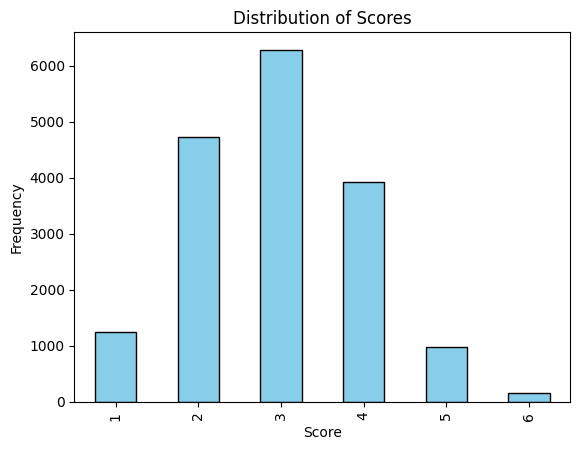

In [10]:
score_distribution = df['score'].value_counts().sort_index()

# Plot the distribution using a bar chart
score_distribution.plot(kind='bar', color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [9]:
# This is the list for stop words
stopwords_list = [
    "a", "about", "above", "according", "across", "actually", "adj", "after", "afterwards", "again",
    "all", "almost", "along", "already", "also", "although", "always", "among", "amongst", "an",
    "am", "and", "another", "any", "anyhow", "anyone", "anything", "anywhere", "are", "aren",
    "aren't", "around", "as", "at", "be", "became", "because", "become", "becomes", "been",
    "beforehand", "begin", "being", "below", "beside", "besides", "between", "both", "but", "by",
    "can", "cannot", "can't", "caption", "co", "come", "could", "couldn", "couldn't", "did", "didn",
    "didn't", "do", "does", "doesn", "doesn't", "don", "don't", "down", "during", "each", "early",
    "eg", "either", "else", "elsewhere", "end", "ending", "enough", "etc", "even", "ever", "every",
    "everywhere", "except", "few", "for", "found", "from", "further", "had", "has", "hasn", "hasn't",
    "have", "haven", "haven't", "he", "hence", "her", "here", "hereafter", "hereby", "herein",
    "hereupon", "hers", "him", "his", "how", "however", "ie", "i.e.", "if", "in", "inc", "inc.",
    "indeed", "instead", "into", "is", "isn", "isn't", "it", "its", "itself", "last", "late",
    "later", "less", "let", "like", "likely", "ll", "ltd", "made", "make", "makes", "many", "may",
    "maybe", "me", "meantime", "meanwhile", "might", "miss", "more", "most", "mostly", "mr", "mrs",
    "much", "must", "my", "myself", "namely", "near", "neither", "never", "nevertheless", "new",
    "next", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "not", "now", "NULL",
    "of", "off", "often", "on", "once", "only", "onto", "or", "other", "others", "otherwise", "our",
    "ours", "ourselves", "out", "over", "own", "per", "perhaps", "rather", "re", "said", "same",
    "say", "seem", "seemed", "seeming", "seems", "several", "she", "should", "shouldn", "shouldn't",
    "since", "so", "some", "still", "stop", "such", "taking", "ten", "than", "that", "the", "their",
    "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore",
    "therein", "thereupon", "these", "they", "this", "those", "though", "thousand", "through",
    "throughout", "thru", "thus", "to", "together", "too", "toward", "towards", "under", "unless",
    "unlike", "unlikely", "until", "up", "upon", "us", "use", "used", "using", "ve", "very", "via",
    "was", "wasn", "we", "well", "were", "weren", "weren't", "what", "whatever", "when", "whence",
    "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever",
    "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whomever", "whose",
    "why", "will", "with", "within", "without", "won", "would", "wouldn", "wouldn't", "yes", "yet",
    "you", "your", "yours", "yourself", "yourselves"
]

final_stopwords_list = list(set(stopwords.words('english')) | set(stopwords_list))
print(len(final_stopwords_list))

337


In [10]:
contractions = {
    "ain't": "am not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "'cause": "because", "could've": "could have",
    "couldn't": "could not", "couldn't've": "could not have", "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not",
    "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", 
    "he'd": "he would",  ## --> he had or he would
    "he'd've": "he would have","he'll": "he will", "he'll've": "he will have", "he's": "he is", 
    "how'd": "how did","how'd'y": "how do you","how'll": "how will","how's": "how is",
    "I'd": "I would",   ## --> I had or I would
    "I'd've": "I would have","I'll": "I will","I'll've": "I will have","I'm": "I am","I've": "I have","isn't": "is not",
    "it'd": "it had",   ## --> It had or It would
    "it'd've": "it would have","it'll": "it will","it'll've": "it will have","it's": "it is",
    "let's": "let us","ma'am": "madam","mayn't": "may not","might've": "might have","mightn't": "might not","mightn't've": "might not have",
    "must've": "must have","mustn't": "must not","mustn't've": "must not have",
    "needn't": "need not","needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not", "oughtn't've": "ought not have",
    "shan't": "shall not","sha'n't": "shall not","shan't've": "shall not have",
    "she'd": "she would",   ## --> It had or It would
    "she'd've": "she would have","she'll": "she will","she'll've": "she will have","she's": "she is",
    "should've": "should have","shouldn't": "should not","shouldn't've": "should not have",
    "so've": "so have","so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have","that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have","there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have","they'll": "they will","they'll've": "they will have","they're": "they are","they've": "they have",
    "to've": "to have","wasn't": "was not","weren't": "were not",
    "we'd": "we had",
    "we'd've": "we would have","we'll": "we will","we'll've": "we will have","we're": "we are","we've": "we have",
    "what'll": "what will","what'll've": "what will have","what're": "what are","what's": "what is","what've": "what have",
    "when's": "when is","when've": "when have",
    "where'd": "where did","where's": "where is","where've": "where have",
    "who'll": "who will","who'll've": "who will have","who's": "who is","who've": "who have","why's": "why is","why've": "why have",
    "will've": "will have","won't": "will not","won't've": "will not have",
    "would've": "would have","wouldn't": "would not","wouldn't've": "would not have",
    "y'all": "you all","y'alls": "you alls","y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are",
    "y'all've": "you all have","you'd": "you had","you'd've": "you would have","you'll": "you you will","you'll've": "you you will have",
    "you're": "you are",  "you've": "you have"
}

contraction_pattern = re.compile('(%s)' % '|'.join(contractions .keys()))

def expand_contractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contraction_pattern.sub(replace, text)

In [11]:
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    text = re.sub(r'\s+', ' ', text)
    return text

def remove_stopwords(text):
    tokens = nltk.word_tokenize(text)
    stop_words = set(final_stopwords_list)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

def lemmatization(text):
    words = nltk.word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if len(word) > 1]
    return ' '.join(lemmatized_words)

def preprocess_with_contractions_and_punctuation_removal(text):
    try:
        text = text.lower() # Convert words to lowercase
        text = re.sub(r'<.*?>', '', text)  # Remove HTML
        text = expand_contractions(text)
        text = remove_stopwords(text) # Remove stopwords
        text = re.sub("@\w+", '',text) # Delete strings starting with @
        text = text.replace(u'\xa0',' ') # Remove \xa0
        text = re.sub("'\d+", '',text) # Delete Numbers
        text = re.sub("\d+", '',text)
        text = re.sub(r'_+', ' ', text)
        text = re.sub("http\w+", '',text)     # Delete URL
        text = remove_punctuation(text) # Remove punctuation
        text = re.sub(r"\s+", " ", text) # Replace consecutive empty spaces with a single space character
        text = lemmatization(text) # Lemmatizing
        text = text.strip()
        return text
    except Exception as e:
        return ''


In [12]:
# text = "This is a test string with an 3?@@@..,,431111 \y21`trqz htrrrt invalid 89 <></>Unicode character: \uD800"
# preprocess_with_contractions_and_punctuation_removal(None)

In [13]:
import re
def preprocess_data(text):
    try:
        text = text.lower()
        text = re.sub(r'<.*?>', '', text) # Remove HTML
        text = re.sub("@\w+", '',text)     # Delete strings starting with @
        text = re.sub("\d+", '',text)
        text = re.sub("'\d+", '',text) # Delete Numbers
        text = re.sub("http\w+", '',text) # Delete URL
        text = text.replace(u'\xa0',' ') # Remove \xa0
        text = re.sub(r'_+', ' ', text)
        text = re.sub(r"\s+", " ", text)
        text = expand_contractions(text)
        # Replace consecutive commas and periods with one comma and period character
        text = re.sub(r"\.+", ".", text)
        text = re.sub(r"\,+", ",", text)
        text = re.sub(r"\s+", " ", text) # Replace consecutive empty spaces with a single space character
        text = text.strip()
        return text
    except Exception as e:
        return ''

### remove_duplicates:
used to remove duplicating sentence in an essay. There is a case in score 2 where there is a very long essay but the content is repeated setences. To process that kind of behavior, I'm removing duplicating sentences in essays.

### preprocessing_for_paragraphs: 
just normalize the text so that each \n\n is garantee to be the separator betweens paragraphs. It handles case where there are abundance of \n\n and if the text after the \n\n is undercase - which it will just treat as a another sentence in the paragrahph (not as a paragraph).

### extract_paragraphs:
Extract paragraph by using \n\n as delimitor.

In [15]:
def remove_duplicates(text):
    sentences = text.split('. ')
    
    # Use an OrderedDict to remove duplicates while preserving order
    unique_sentences = list(OrderedDict.fromkeys(sentences))
    
    # Join the unique sentences back into a single string
    result = '. '.join(unique_sentences)
    
    # Ensure the final sentence ends with a period if it originally did
    if text.endswith('.'):
        result += '.'
    
    return result

def extract_sentences(text):
    # Use a regular expression to split the text into sentences
    # This will handle periods, exclamation marks, and question marks as sentence terminators
    sentences = re.split(r'[.!?]+\s*', text)
    sentences = [s.strip() for s in sentences if s.strip()]
    return sentences

def extract_words(text):
    words = re.findall(r"\w+(?:[-']\w+)*", text)
    return words

def preprocessing_for_paragraphs(text):
    # If before /n/n is not a mark, this is not the end of a paragraph    
    text = re.sub(r'(?<![\.\!\?])\n\n', ' ', text)

    #If after \n\n is an normal case, replace with space
    text = re.sub(r'\n\n([a-z])', ' ', text)
    
    return text.strip()

def extract_paragraphs(text):
    processed_text = preprocessing_for_paragraphs(text)
    paragraphs = processed_text.split('\n\n')
    
    return paragraphs

In [ ]:
# columns = [(pl.col("full_text").apply(extract_paragraphs).alias("paragraph"))]
# df = pl.from_pandas(df).with_columns([pl.col("full_text").apply(remove_duplicates)])

# df = df.with_columns(columns)


* Paragraph_Preprocess: Calculate features paragraph_len, paragraph_sentence_cnt and paragraph_word_cnt.
* Paragraph_Eng: Calculate more advanced features that based on classification of paragraph_len - by bucket (the size probably change a lot but there are 2 ways to say this:
   - Accumalative: The paragraph is > 500, >600...
   - Bucked: The paragrah is between 0-200, 200-400...
   The code I'm using bucket classification.
* Features that it calculate:
  - Bucket (count accurance) of each paragraph to each bucket defined above.
  - Calculate features: max, mean, sum, min for each features created in Paragraph_Preprocess

In [16]:
# paragraph features
def paragraph_preprocess(temp_df):
    # Expand the paragraph list into several lines of data
    temp_df = temp_df.explode('paragraph')
    
    # Paragraph preprocessing
    temp_df = temp_df.with_columns(pl.col('paragraph').map_elements(preprocess_data))
    
    # Calculate the length of each paragraph
    temp_df = temp_df.with_columns(
        pl.col('paragraph').map_elements(lambda x: len(x)).alias("paragraph_len"),
        pl.col('paragraph').map_elements(lambda x: len(extract_sentences(x))).alias('paragraph_sentence_cnt'),
        pl.col('paragraph').map_elements(lambda x: len(extract_words(x))).alias('paragraph_word_cnt'),
        pl.col('paragraph').map_elements(lambda x: len(set(extract_words(x)))).alias('paragraph_unique_word_cnt')
    )
    return temp_df

In [17]:
length_ranges = [(1, 100), (101, 200), (201, 300), (301, 400), (401, 500), (501, 600), (601, 800)]
paragraph_fea = ['paragraph_len', 'paragraph_sentence_cnt', 'paragraph_word_cnt', 'paragraph_unique_word_cnt']

def paragraph_feature_engineering(train_df):
    count_aggs = [
        pl.col('paragraph').filter((pl.col('paragraph_len') >= start) & (pl.col('paragraph_len') <= end)).count().alias(f"paragraph_len_between_{start}_{end}_cnt")
        for start, end in length_ranges
    ]

    aggs = [
        # Count the number of paragraph lengths greater than and less than the i-value
        *[pl.col('paragraph').filter(pl.col('paragraph_len') >= i).count().alias(f"paragraph_len_geq_{i}_cnt") for i in [100,150,200,300,350,400,500,600,700] ], 
        *[pl.col(fea).max().alias(f"{fea}_max") for fea in paragraph_fea],
        *[pl.col(fea).mean().alias(f"{fea}_mean") for fea in paragraph_fea],
        *[pl.col(fea).sum().alias(f"{fea}_sum") for fea in paragraph_fea],
        *[pl.col(fea).min().alias(f"{fea}_min") for fea in paragraph_fea],
        ]

    df = train_df.group_by(['essay_id'], maintain_order=True).agg(count_aggs + aggs).sort("essay_id")
    df = df.to_pandas()
    return df

In [ ]:
# train_preprocessed = paragraph_preprocess(df)
# train_features = paragraph_feature_engineering(train_preprocessed)

# # Obtain feature names
# feature_names = list(filter(lambda x: x not in ['essay_id','score'], train_features.columns))

# print(f'Features Number: {len(feature_names)}')
# train_features.head(5)

# Sentence based features¶
**Now we will do some sentence processing. The steps is pretty similar to paragraph, which only a few differences:**

* Sentence_Preprocess: Calculate features sentence_len, sentence_word_cnt
* Sentence_Eng: Calculate bucketed ranges of sentence + max, min, mean of features created in Sentence_Preprocess.

In [18]:
def sentence_preprocess(temp_df):
    # Preprocess full_text and use periods to segment sentences in the text
    temp_df = temp_df.with_columns( pl.col('full_text').map_elements(preprocess_data).map_elements(extract_sentences).alias("sentences"))
    temp_df = temp_df.explode('sentences')
    
    temp_df = temp_df.with_columns(
        pl.col('sentences').map_elements(lambda x: len(x)).alias("sentence_len"),
        pl.col('sentences').map_elements(lambda x: len(extract_words(x))).alias("sentence_word_cnt"),
        pl.col('sentences').map_elements(lambda x: len(set(extract_words(x)))).alias("sentence_unique_word_cnt")
    )
    
    return temp_df

In [19]:
sentence_length_ranges = [(1, 50), (51, 100), (101, 150), (151, 300)]
sentence_fea = ['sentence_len','sentence_word_cnt', 'sentence_unique_word_cnt']

def sentence_feature_engineering(train_tmp):
    
    count_aggs = [
        pl.col('sentences').filter((pl.col('sentence_len') >= start) & (pl.col('sentence_len') <= end)).count().alias(f"sentence_len_between_{start}_{end}_cnt")
        for start, end in sentence_length_ranges
    ]
    
    aggs = [
        *[pl.col('sentences').filter(pl.col('sentence_len') >= i).count().alias(f"sentence_len_geq_{i}_cnt") for i in [50,100,150,300] ], 
        *[pl.col(fea).max().alias(f"{fea}_max") for fea in sentence_fea],
        *[pl.col(fea).mean().alias(f"{fea}_mean") for fea in sentence_fea],
    ]

    df = train_tmp.group_by(['essay_id'], maintain_order=True).agg(count_aggs + aggs).sort("essay_id")
    df = df.to_pandas()
    
    return df

In [ ]:
# train_preprocessed = sentence_preprocess(df)
# train_features = train_features.merge(sentence_feature_engineering(train_preprocessed), on='essay_id', how='left')

# feature_names = list(filter(lambda x: x not in ['essay_id','score'], train_features.columns))
# print('Features Number: ',len(feature_names))
# train_features.head(5)

**Now we will do some sentence processing. The steps is pretty similar to paragraph and sentence, which only a few differences:**

* Word_Preprocess: Calculate features word_len (making sure word is not empty)
* Word_Eng: Calulate bucket length for word_len + max, mean, std, sum for features created in Word_Preprocess.

In [20]:
def word_preprocess(temp_df):
    # Preprocess full_text and use spaces to separate words from the text
    temp_df = temp_df.with_columns(pl.col('full_text').map_elements(preprocess_data).map_elements(extract_words).alias('word'))
    temp_df = temp_df.explode('word')
    
    # Calculate the length of each word
    temp_df = temp_df.with_columns(pl.col('word').map_elements(lambda x: len(x)).alias("word_len"))
    
    # Delete data with a word length of 0
    temp_df = temp_df.filter(pl.col('word_len') != 0)
    
    return temp_df

In [21]:
word_length_ranges = [(1, 5), (6, 10), (11, 15)]

def word_feature_engineering(train_tmp):
    
    count_aggs = [
        pl.col('word').filter((pl.col('word_len') >= start) & (pl.col('word_len') <= end)).count().alias(f"word_len_between_{start}_{end}_cnt")
        for start, end in word_length_ranges
    ]
    aggs = [
        # Count the number of words with a length greater than i+1
        *[pl.col('word').filter(pl.col('word_len') >= i+1).count().alias(f"word_len_geq_{i+1}_cnt") for i in range(15) ], 

        pl.col('word_len').max().alias(f"word_len_max"),
        pl.col('word_len').mean().alias(f"word_len_mean"),
        pl.col('word_len').std().alias(f"word_len_std"),
        ]

    df = train_tmp.group_by(['essay_id'], maintain_order=True).agg(count_aggs + aggs).sort("essay_id")
    
    df = df.to_pandas()
    
    return df

In [ ]:
# train_preprocessed = word_preprocess(df)

# # Merge the newly generated feature data with the previously generated feature data
# train_features = train_features.merge(word_feature_engineering(train_preprocessed), on='essay_id', how='left')

# feature_names = list(filter(lambda x: x not in ['essay_id','score'], train_features.columns))
# print('Features Number: ',len(feature_names))
# train_features.head(5)

In [ ]:
#  train_features.columns

# Character TFIDF features¶

In [22]:
def tokenizer_function(x):
    return x

def preprocessor_function(x):
    return x

In [ ]:
# character_tfidf_vectorizer = TfidfVectorizer(
#             tokenizer = tokenizer_function,
#             preprocessor = preprocessor_function,
#             token_pattern = None,
#             strip_accents = 'unicode',
#             analyzer = 'word',
#             ngram_range = (1,3),
#             min_df = 0.1,
#             max_df = 0.95,
#             sublinear_tf = True,
# )
# # Processed text
# processed_text = df["full_text"].apply(lambda x: preprocess_with_contractions_and_punctuation_removal(x))
# character_train_tfidf = character_tfidf_vectorizer.fit_transform([i for i in processed_text])
# joblib.dump(character_tfidf_vectorizer, 'character_tfidf_vectorizer.pkl')
# character_tfidf_feature_names = character_tfidf_vectorizer.get_feature_names_out()
# tfidf_features = pd.DataFrame(character_train_tfidf.toarray(), columns=[f"tfidf_{name}" for name in character_tfidf_feature_names ])
# tfidf_features['essay_id'] = train_features['essay_id']
# train_features = train_features.merge(tfidf_features, on='essay_id', how='left')

# print('Character tf-idf features:')
# print(character_tfidf_feature_names[0:100])

# feature_names = list(filter(lambda x: x not in ['essay_id','score'], train_features.columns))
# print('Features Number: ',len(feature_names))
# train_features.head(5)

# Word TF-IDF

In [ ]:
# # TfidfVectorizer parameter
# word_tfidf_vectorizer = TfidfVectorizer(
#     preprocessor = preprocessor_function,
#     strip_accents = 'unicode',
#     analyzer = 'word',
#     ngram_range = (1, 3),
#     min_df = 0.05,
#     max_df = 0.85,
#     sublinear_tf = True,
#     stop_words = final_stopwords_list,
# )

# # Fit all datasets into TfidfVectorizer
# train_tfidf = word_tfidf_vectorizer.fit_transform([i for i in processed_text])
# word_tfidf_feature_names = word_tfidf_vectorizer.get_feature_names_out()
# print('Word tf-idf features:')
# print(word_tfidf_feature_names[0:100])

# df_temp = pd.DataFrame(train_tfidf.toarray(), columns=[f"tfidf_{name}" for name in word_tfidf_feature_names])
# df_temp['essay_id'] = train_features['essay_id']
# train_features = train_features.merge(df_temp, on='essay_id', how='left')

# feature_names = list(filter(lambda x: x not in ['essay_id','score'], train_features.columns))
# print('Features Number: ',len(feature_names))

# train_features.head(5)

In [ ]:
# joblib.dump(word_tfidf_vectorizer, 'word_tfidf_vectorizer.pkl')

In [ ]:
# joblib.dump(word_tfidf_feature_names, 'word_tfidf_feature_names.pkl')


In [ ]:
# processed_text = df["full_text"].apply(lambda x: preprocess_data(x))

In [ ]:
# processed_text

## Centroid Features
The logic for this feature is simple:

* We use TFIDF for the traind data and it looks like it works in the test data -> The essays in the test data must have similar words -> Might have the same topics as the train data.
* As we have encovered the essay topics in the dataset, we can use K-means to cluster them and calculate the distance between it and the centroid - effectively measure if the essays is close to its topic, and therefore - better.

In [ ]:
# tfidf_w_columns = [ f'tfidf_{i}' for i in word_tfidf_feature_names]
# test_tfidf = train_features[tfidf_w_columns]
# test_tfidf[test_tfidf > 0].agg(['count', 'min', 'max', 'std', 'mean']).T.to_csv('tfidf_test.csv')
# # Create test copy of dataframe
# kmean_test = train_features[tfidf_w_columns]
# # Initialize KMeans with the number of clusters you want
# kmeans = KMeans(n_clusters=7, random_state=42)

# # Fit the model to the data
# kmeans.fit(kmean_test)


# # Predict the clusters for the data points
# labels = kmeans.labels_

# # Get the centroids
# centroids = kmeans.cluster_centers_

# joblib.dump(kmeans, 'kmeans_model.pkl')

# # Calculate the distance to the centroid
# distances = np.sqrt(((kmean_test - centroids[labels]) ** 2).sum(axis=1))

# cosine_distances_to_centroid = [
#     cosine_distances([kmean_test.iloc[i]], [centroids[label]])[0][0]
#     for i, label in enumerate(labels)
# ]

# # Add the distances to the DataFrame
# kmean_test['DistanceToCentroid'] = distances
# kmean_test['CosineDistanceToCentroid'] = cosine_distances_to_centroid

# train_features['DistanceToCentroid'] = kmean_test['DistanceToCentroid']
# train_features['CosineDistanceToCentroid'] = kmean_test['CosineDistanceToCentroid']

## CountVectorizer Features

In [ ]:
# count_vectorizer = CountVectorizer(
#             strip_accents='unicode',
#             analyzer = 'word',
#             ngram_range=(2,3),
#             min_df=0.05, 
#             max_df=0.85,
# )

# train_count = count_vectorizer.fit_transform([i for i in processed_text])

# dense_matrix = train_count.toarray()
# word_count_feature_names = count_vectorizer.get_feature_names_out()
# print(word_count_feature_names[0:100])

# df = pd.DataFrame(dense_matrix,  columns=[f"count_{name}" for name in word_count_feature_names])
# df['essay_id'] = train_features['essay_id']
# train_features = train_features.merge(df, on='essay_id', how='left')

# feature_names = list(filter(lambda x: x not in ['essay_id','score'], train_features.columns))
# print('Features Number: ',len(feature_names))
# train_features.head()

In [ ]:
# joblib.dump(count_vectorizer, 'count_tfidf_vectorizer.pkl')

# Preprocessing

## Extra features:¶
Followings are some extra features.

* spelling: Calculate spelling mistakes in an essay
* count_sym: Calculate synnonym
* run: Calculate a bunch of features like unique_word_count, splling_err_num, full_stop_ratio, comma_ratio

In [24]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
class Preprocessor:
    def __init__(self) -> None:
        self.STOP_WORDS = set(final_stopwords_list)
        self.spellchecker = SpellChecker()

    def spelling(self, text):
        text_2 = re.sub(r'[^\w\s]', ' ', text)
        amount_miss = len(list(self.spellchecker.unknown(text_2.split())))
        return amount_miss
    
    def find_wrong_punctuation(self, text):
        punctuations = ['.', ',', ';', '?', '!', ':']
        lowercase_list = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
        uppercase_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

        # find punctuation in the text
        wrong_punctuations = 0
        length = len(text)

        for i in range(length):
            if text[i] in punctuations and i < length - 1:
                if text[i + 1] in lowercase_list or text[i + 1] in uppercase_list:
                    wrong_punctuations += 1

        return wrong_punctuations
    
    def noun_verb_adj_adv_adp_others(self, text):
        doc = nlp(text)
        pos_counts = doc.count_by(spacy.attrs.POS)
        nouns = 0
        verbs = 0
        adj = 0
        adv = 0
        adp_conj = 0
        others = 0

        for pos_id, count in pos_counts.items():
            pos_tag = doc.vocab.strings[pos_id]
            if pos_tag in ['NOUN', 'PROPN', 'PRON']:
                nouns += count
            elif pos_tag in ['VERB', 'AUX']:
                verbs += count
            elif pos_tag == 'ADJ':
                adj += count
            elif pos_tag == 'ADV':
                adv += count
            elif pos_tag in ['ADP', 'CONJ']:
                adp_conj += count
            else:
                others += count

        return nouns, verbs, adj, adv, adp_conj, others
    
    def count_sym(self, text, sym):
        sym_count = 0
        for l in text:
            if l == sym:
                sym_count += 1
        return sym_count
    
    def lexical_diversity(self,text):
        # Tokenize the text into words
        words = nltk.word_tokenize(text)

        # Calculate the number of unique words (types) and total number of words (tokens)
        num_types = len(set(words))
        num_tokens = len(words)

        # Calculate the Type-Token Ratio (TTR)
        ttr = num_types / num_tokens

        return ttr
    
    def calculate_collocation_diversity(self,text):
        tokens = nltk.word_tokenize(text)
        finder = BigramCollocationFinder.from_words(tokens)
        return len(finder.score_ngrams(BigramAssocMeasures.mi_like)) / float(len(tokens))

    def calculate_collocation_strength(self,text):
        tokens = nltk.word_tokenize(text)
        finder = BigramCollocationFinder.from_words(tokens)
        collocations = finder.nbest(BigramAssocMeasures.mi_like, 10)  # Get top 10 collocations
        return sum(score for bigram, score in finder.score_ngrams(BigramAssocMeasures.mi_like)) / float(len(collocations))    

    def run(self, data: pd.DataFrame, mode:str) -> pd.DataFrame:
        
          # preprocessing the text
        data["processed_text"] = data["full_text"].apply(lambda x: preprocess_with_contractions_and_punctuation_removal(x))

            
        data[['nouns', 'verbs', 'adj', 'adv', 'adp_conj', 'others']] = data['processed_text'].apply(lambda x: pd.Series(self.noun_verb_adj_adv_adp_others(x)))
        
         # distinct word count
        data['distinct_word_count'] = data['processed_text'].apply(lambda x: len(set(word_tokenize(x))))
        
        # coleman
        data['coleman_liau'] = data['processed_text'].apply(lambda x: textstat.coleman_liau_index(x))
        
        # Text tokenization
        data["text_tokens"] = data["processed_text"].apply(lambda x: word_tokenize(x))
        
         # lexical diversity
        data['lexical_diversity'] = data['full_text'].apply(lambda x: self.lexical_diversity(x))
        
        # collocation diversity
        data['collocation_diversity'] = data['processed_text'].apply(lambda x: self.calculate_collocation_diversity(x))
                
        # collocation strength
        data['collocation_strength'] = data['processed_text'].apply(lambda x: self.calculate_collocation_strength(x))
        
        # essay length
        data["text_length"] = data["processed_text"].apply(lambda x: len(x))
        data["full_text_length"] = data["full_text"].apply(lambda x: len(x))
        
        # essay word count
        data["word_count"] = data["text_tokens"].apply(lambda x: len(x))
        
        # essay unique word count
        data["unique_word_count"] = data["text_tokens"].apply(lambda x: len(set(x)))
        
        # essay sentence count
        data["sentence_count"] = data["full_text"].apply(lambda x: len(extract_sentences(x)))
        
        # essay paragraph count
        data["paragraph_count"] = data["full_text"].apply(lambda x: len(extract_paragraphs(x)))
        
        # count misspelling
        data["splling_err_num"] = data["processed_text"].progress_apply(self.spelling)
        data["splling_err_ratio"] = data["splling_err_num"] / data["text_length"]
        
        # ratio fullstop / text_length 
        data["fullstop_ratio"] = data["full_text"].apply(lambda x: x.count(".")/len(x))
        
        # ratio comma / text_length
        data["comma_ratio"] = data["full_text"].apply(lambda x: x.count(",")/len(x))
        
        return data

In [ ]:
# df.columns

In [ ]:
# preprocessor = Preprocessor()
# tmp = preprocessor.run(df, mode="train")
# train_features = train_features.merge(tmp, on='essay_id', how='left')
# feature_names = list(filter(lambda x: x not in ['essay_id','score'], train_features.columns))

# print('Features Number: ',len(feature_names))
# train_features.head(5)

In [ ]:
# train_features.to_csv('output.csv', index=False)

## Readabilty metrics

In [77]:
def preprocess_full_text_with_readability(temp_df):
    # Preprocess the full text
    temp_df['full_text'] = temp_df['full_text'].apply(preprocess_data)
    
    # Calculate readability metrics
    tqdm.pandas(desc="Calculating Readability")  # Optional: for progress bar
    temp_df['Flesch-Kincaid'] = temp_df['full_text'].apply(lambda x: textstat.flesch_kincaid_grade(x))
    temp_df['Gunning Fog'] = temp_df['full_text'].apply(lambda x: textstat.gunning_fog(x))
    temp_df['Coleman-Liau'] = temp_df['full_text'].apply(lambda x: textstat.coleman_liau_index(x))
    
    return temp_df

## Sentiment Polarity

In [78]:
# Sentiment Analysis using TextBlob
def sentiment_textblob(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Sentiment Analysis using VADER
vader_analyzer = SentimentIntensityAnalyzer()

def sentiment_vader(text):
    scores = vader_analyzer.polarity_scores(text)
    return scores['compound']  # Return the compound score as polarity


def preprocess_full_text_with_sentiment(temp_df):
    # Preprocess the full text
    temp_df['sentiment_textblob'] = temp_df['full_text'].apply(sentiment_textblob)
    temp_df['sentiment_vader'] = temp_df['full_text'].apply(sentiment_vader)
    
    return temp_df



## Topic Modeling

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from scipy.stats import entropy

In [80]:
def preprocess_full_text_with_lda(temp_df, n_components=4):
    # Sample data (replace with your actual data)
    documents = temp_df['processed_text'].tolist()
    
    # Vectorization
    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    tf = vectorizer.fit_transform(documents)
    
    # LDA Topic Modeling
    lda = LatentDirichletAllocation(n_components=n_components, random_state=42)
    topic_distributions = lda.fit_transform(tf)
    
    joblib.dump(vectorizer, 'lda_count_vectorizer.pkl')
    joblib.dump(lda, 'lda_model.pkl')
    
    # Extracting LDA features
    dominant_topic = np.argmax(topic_distributions, axis=1).reshape(-1, 1)
    topic_entropy = entropy(topic_distributions.T).reshape(-1, 1)
    lda_features = np.hstack([topic_distributions, dominant_topic, topic_entropy])
    
    # Creating column names for LDA topics
    lda_columns = [f'LDA_topic_{i}' for i in range(n_components)]
    
    # Creating a DataFrame for LDA features
    lda_features_df = pd.DataFrame(lda_features, columns=lda_columns + ['LDA_dominant_topic', 'LDA_topic_entropy'])
    
    # Concatenate with original DataFrame
    temp_df = pd.concat([temp_df, lda_features_df], axis=1)
    
    return temp_df


## Pesuasive and engagement count

In [56]:
nlp = spacy.load("en_core_web_sm")

# Define persuasive, engagement, and question indicators
persuasive_words = {
    "therefore", "thus", "consequently", "hence", "in conclusion", 
    "clearly", "obviously", "undoubtedly", "moreover", "additionally", 
    "furthermore", "accordingly", "henceforth", "henceforward", 
    "as a result", "for this reason", "with this in mind"
}
engagement_words = {
    "you", "your", "we", "our", "us", "yourself", "yourselves", 
    "myself", "ourselves", "yours", "mine", "ourself", "ours", 
    "their", "theirs", "them"
}
question_words = {
    "what", "how", "why", "when", "where", "who", "which", 
    "whose", "whom"
}



def preprocess_full_text_with_engagement(temp_df):
    # Combine words into regex patterns
    persuasive_pattern = '|'.join(r'\b{}\b'.format(word) for word in persuasive_words)
    engagement_pattern = '|'.join(r'\b{}\b'.format(word) for word in engagement_words)
    question_pattern = '|'.join(r'\b{}\b'.format(word) for word in question_words)

    # Convert text to lowercase
    temp_df['text_lower'] = temp_df['full_text'].str.lower()

    # Count occurrences using vectorized string operations
    temp_df['persuasive_count'] = temp_df['text_lower'].str.count(persuasive_pattern)
    temp_df['engagement_count'] = temp_df['text_lower'].str.count(engagement_pattern)
    temp_df['question_count'] = temp_df['text_lower'].str.count(question_pattern)

    # Count question marks
    temp_df['question_mark_count'] = temp_df['full_text'].str.count(r'\?')

    # Combine question word count and question mark count
    temp_df['question_count'] = temp_df[['question_count', 'question_mark_count']].max(axis=1)

    # Drop temporary columns
    temp_df = temp_df.drop(['text_lower', 'question_mark_count'], axis=1)

    return temp_df

## Test Data

In [23]:
# test_path = '/kaggle/input/learning-agency-lab-automated-essay-scoring-2/test.csv'

In [24]:
# test = pd.read_csv(test_path)


In [ ]:
# try: 
#     columns = [(pl.col("full_text").apply(extract_paragraphs).alias("paragraph"))]
#     test = pl.from_pandas(test).with_columns([pl.col("full_text").apply(remove_duplicates)])
#     test = test.with_columns(columns)
# except Exception as e:
#     logging.error(f"Error during conversion to polars dataframe and removal of duplicates: {e}")


In [ ]:
# models_base_path = '/kaggle/input/automated-essay-scoring-2.0/other/lgbm/4'

In [ ]:
# try:
#     # Paragraph
#     logging.info("Starting paragraph preprocessing")
#     tmp = paragraph_preprocess(test)
#     test_features = paragraph_feature_engineering(tmp)
#     logging.info("Paragraph preprocessing completed successfully")
# except Exception as e:
#     logging.error(f"Error during paragraph preprocessing: {e}")
# print(test_features)
# try:
#     # Sentence
#     logging.info("Starting sentence preprocessing")
#     tmp = sentence_preprocess(test)
#     test_features = test_features.merge(sentence_feature_engineering(tmp), on='essay_id', how='left')
#     logging.info("Sentence preprocessing completed successfully")
# except Exception as e:
#     logging.error(f"Error during sentence preprocessing: {e}")

# try:
#     # Word
#     logging.info("Starting word preprocessing")
#     tmp = word_preprocess(test)
#     test_features = test_features.merge(word_feature_engineering(tmp), on='essay_id', how='left')
#     logging.info("Word preprocessing completed successfully")
# except Exception as e:
#     logging.error(f"Error during word preprocessing: {e}")

# try:
#     # Character Tfidf
#     logging.info("Starting character TF-IDF vectorization")
#     processed_text = test.to_pandas()["full_text"].progress_apply(lambda x: preprocess_with_contractions_and_punctuation_removal(x))

#     character_tfidf_vectorizer = joblib.load(f"{models_base_path}/character_tfidf_vectorizer.pkl")
#     test_tfidf = character_tfidf_vectorizer.transform([i for i in processed_text])
#     feature_names = character_tfidf_vectorizer.get_feature_names_out()
#     df = pd.DataFrame(test_tfidf.toarray(), columns=[f'tfidf_{name}' for name in feature_names])
#     df['essay_id'] = test_features['essay_id']
#     test_features = test_features.merge(df, on='essay_id', how='left')
#     logging.info("Character TF-IDF vectorization completed successfully")
# except Exception as e:
#     logging.error(f"Error during character TF-IDF vectorization: {e}")

# try:
#     # Word Tfidf
#     logging.info("Starting word TF-IDF vectorization")
#     word_tfidf_vectorizer = joblib.load(f"{models_base_path}/word_tfidf_vectorizer.pkl")
#     test_tfidf = word_tfidf_vectorizer.transform([i for i in processed_text])
#     feature_names = word_tfidf_vectorizer.get_feature_names_out()
#     df = pd.DataFrame(test_tfidf.toarray(), columns=[f'tfidf_{name}' for name in feature_names])
#     df['essay_id'] = test_features['essay_id']
#     test_features = test_features.merge(df, on='essay_id', how='left')
#     logging.info("Word TF-IDF vectorization completed successfully")
# except Exception as e:
#     logging.error(f"Error during word TF-IDF vectorization: {e}")

# try:
#     # KMeans
#     logging.info("Starting KMeans clustering")
#     word_tfidf_feature_names = joblib.load(f"{models_base_path}/word_tfidf_feature_names.pkl")
#     tfidf_w_columns = [f'tfidf_{i}' for i in word_tfidf_feature_names]

#     kmean_test = test_features[tfidf_w_columns]
#     kmeans = joblib.load(f"{models_base_path}/kmeans_model.pkl")

#     labels = kmeans.predict(kmean_test)
#     centroids = kmeans.cluster_centers_
#     logging.info(f"Number of centroids: {len(centroids)}")
#     distances = np.sqrt(((kmean_test - centroids[labels]) ** 2).sum(axis=1))
#     cosine_distances_to_centroid = [
#         cosine_distances([kmean_test.iloc[i]], [centroids[label]])[0][0]
#         for i, label in enumerate(labels)
#     ]

#     kmean_test['DistanceToCentroid'] = distances
#     kmean_test['CosineDistanceToCentroid'] = cosine_distances_to_centroid

#     test_features['DistanceToCentroid'] = kmean_test['DistanceToCentroid']
#     test_features['CosineDistanceToCentroid'] = kmean_test['CosineDistanceToCentroid']
#     logging.info("KMeans clustering completed successfully")
# except Exception as e:
#     logging.error(f"Error during KMeans clustering: {e}")

# try:
#     # Word vectorize with Count Vectorizer
#     logging.info("Starting word vectorization with Count Vectorizer")
#     count_vectorizer = joblib.load(f"{models_base_path}/count_tfidf_vectorizer.pkl")
#     test_count = count_vectorizer.transform([i for i in processed_text])
#     feature_names = count_vectorizer.get_feature_names_out()
#     test_count_df = pd.DataFrame(test_count.toarray(), columns=[f'count_{name}' for name in feature_names])
#     test_count_df['essay_id'] = test_features['essay_id']
#     test_features = test_features.merge(test_count_df, on='essay_id', how='left')
#     logging.info("Word vectorization with Count Vectorizer completed successfully")
# except Exception as e:
#     logging.error(f"Error during word vectorization with Count Vectorizer: {e}")

# try:
#     # Extra feature
#     logging.info("Starting extra feature preprocessing")
#     preprocessor = Preprocessor()
#     tmp = preprocessor.run(test.to_pandas(), mode="train")
#     test_features = test_features.merge(tmp, on='essay_id', how='left')
#     logging.info("Extra feature preprocessing completed successfully")
# except Exception as e:
#     logging.error(f"Error during extra feature preprocessing: {e}")

# try:
#     # Features number
#     feature_names = list(filter(lambda x: x not in ['essay_id','score'], test_features.columns))
#     logging.info(f'Features number: {len(feature_names)}')
#     logging.info(f"First few rows of test_features: \n{test_features.head(3)}")
# except Exception as e:
#     logging.error(f"Error during feature extraction or final merging: {e}")

In [ ]:
# test_features

# Deberta Base 5 Fold  model training

## Deberta Embedding

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [15]:
class CFG:
    seed = 42  # Random seed
    preset = "deberta_v3_extra_small_en" # Name of pretrained models
    sequence_length = 512  # Input sequence length
    epochs = 3 # Training epochs
    batch_size = 32 # Batch size
    scheduler = 'cosine'  # Learning rate scheduler

In [16]:
preprocessor = keras_nlp.models.DebertaV3Preprocessor.from_preset(
    preset=CFG.preset, # Name of the model
    sequence_length=CFG.sequence_length, # Max sequence length, will be padded if shorter
)

Attaching 'tokenizer.json' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...
Attaching 'tokenizer.json' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...
Attaching 'assets/tokenizer/vocabulary.spm' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...


In [17]:
@tf.function
def preprocess_fn(text, label=None):
    text = preprocessor(text)  # Preprocess text
    return (text, label) if label is not None else text  # Return processed text and label if available

In [18]:
class WeightedKappa(keras.metrics.Metric):
    def __init__(self, num_classes=6, epsilon=1e-6):
        super().__init__(name="weighted_kappa")
        self.num_classes = num_classes
        self.epsilon = epsilon

        label_vec = keras.ops.arange(num_classes, dtype=keras.backend.floatx())
        self.row_label_vec = keras.ops.reshape(label_vec, [1, num_classes])
        self.col_label_vec = keras.ops.reshape(label_vec, [num_classes, 1])
        col_mat = keras.ops.tile(self.col_label_vec, [1, num_classes])
        row_mat = keras.ops.tile(self.row_label_vec, [num_classes, 1])
        self.weight_mat = (col_mat - row_mat) ** 2

        self.numerator = self.add_weight(name="numerator", initializer="zeros")
        self.denominator = self.add_weight(name="denominator", initializer="zeros")
        self.o_sum = self.add_weight(name="o_sum", initializer="zeros")
        self.e_sum = self.add_weight(name="e_sum", initializer="zeros")

    def update_state(self, y_true, y_pred, **args):
        # revert ordinal regression labels to classification labels
        y_true = keras.ops.one_hot(
            keras.ops.sum(keras.ops.cast(y_true, dtype="int8"), axis=-1) - 1, 6
        )
        y_pred = keras.ops.one_hot(
            keras.ops.sum(keras.ops.cast(y_pred > 0.5, dtype="int8"), axis=-1) - 1, 6
        )
        # weighted kappa calculation
        y_true = keras.ops.cast(y_true, dtype=self.col_label_vec.dtype)
        y_pred = keras.ops.cast(y_pred, dtype=self.weight_mat.dtype)
        batch_size = keras.ops.shape(y_true)[0]

        cat_labels = keras.ops.matmul(y_true, self.col_label_vec)
        cat_label_mat = keras.ops.tile(cat_labels, [1, self.num_classes])
        row_label_mat = keras.ops.tile(self.row_label_vec, [batch_size, 1])

        weight = (cat_label_mat - row_label_mat) ** 2

        self.numerator.assign_add(keras.ops.sum(weight * y_pred))
        label_dist = keras.ops.sum(y_true, axis=0, keepdims=True)
        pred_dist = keras.ops.sum(y_pred, axis=0, keepdims=True)
        w_pred_dist = keras.ops.matmul(
            self.weight_mat, keras.ops.transpose(pred_dist, [1, 0])
        )
        self.denominator.assign_add(
            keras.ops.sum(keras.ops.matmul(label_dist, w_pred_dist))
        )

        self.o_sum.assign_add(keras.ops.sum(y_pred))
        self.e_sum.assign_add(
            keras.ops.sum(
                keras.ops.matmul(keras.ops.transpose(label_dist, [1, 0]), pred_dist)
            )
        )

    def result(self):
        return 1.0 - (
            keras.ops.divide_no_nan(self.numerator, self.denominator)
            * keras.ops.divide_no_nan(self.e_sum, self.o_sum)
        )

    def reset_state(self):
        self.numerator.assign(0)
        self.denominator.assign(0)
        self.o_sum.assign(0)
        self.e_sum.assign(0)

In [19]:
# def create_model():
    
#     return model

In [20]:
import math

def get_lr_callback(batch_size=8, mode='cos', epochs=10, plot=False):
    lr_start, lr_max, lr_min = 0.6e-5, 0.3e-5 * batch_size, 0.3e-5
    lr_ramp_ep, lr_sus_ep, lr_decay = 2, 0, 0.75

    def lrfn(epoch):  # Learning rate update function
        if epoch < lr_ramp_ep: lr = (lr_max - lr_start) / lr_ramp_ep * epoch + lr_start
        elif epoch < lr_ramp_ep + lr_sus_ep: lr = lr_max
        elif mode == 'exp': lr = (lr_max - lr_min) * lr_decay**(epoch - lr_ramp_ep - lr_sus_ep) + lr_min
        elif mode == 'step': lr = lr_max * lr_decay**((epoch - lr_ramp_ep - lr_sus_ep) // 2)
        elif mode == 'cos':
            decay_total_epochs, decay_epoch_index = epochs - lr_ramp_ep - lr_sus_ep + 3, epoch - lr_ramp_ep - lr_sus_ep
            phase = math.pi * decay_epoch_index / decay_total_epochs
            lr = (lr_max - lr_min) * 0.5 * (1 + math.cos(phase)) + lr_min
        return lr

    if plot:  # Plot lr curve if plot is True
        plt.figure(figsize=(10, 5))
        plt.plot(np.arange(epochs), [lrfn(epoch) for epoch in np.arange(epochs)], marker='o')
        plt.xlabel('epoch'); plt.ylabel('lr')
        plt.title('LR Scheduler')
        plt.show()

    return keras.callbacks.LearningRateScheduler(lrfn, verbose=False)  # Create lr callback

In [22]:
def to_ordinal(y, num_classes=None, dtype="float32"):
    """Converts a class vector (integers) to an ordinal regression matrix.

    This utility encodes class vector to ordinal regression/classification
    matrix where each sample is indicated by a row and rank of that sample is
    indicated by number of ones in that row.

    Args:
        y: Array-like with class values to be converted into a matrix
            (integers from 0 to `num_classes - 1`).
        num_classes: Total number of classes. If `None`, this would be inferred
            as `max(y) + 1`.
        dtype: The data type expected by the input. Default: `'float32'`.

    Returns:
        An ordinal regression matrix representation of the input as a NumPy
        array. The class axis is placed last.
    """
    y = np.array(y, dtype="int")
    input_shape = y.shape

    # Shrink the last dimension if the shape is (..., 1).
    if input_shape and input_shape[-1] == 1 and len(input_shape) > 1:
        input_shape = tuple(input_shape[:-1])

    y = y.reshape(-1)
    if not num_classes:
        num_classes = np.max(y) + 1
    n = y.shape[0]
    range_values = np.arange(num_classes - 1)
    range_values = np.tile(np.expand_dims(range_values, 0), [n, 1])
    ordinal = np.zeros((n, num_classes - 1), dtype=dtype)
    ordinal[range_values < np.expand_dims(y, -1)] = 1
    output_shape = input_shape + (num_classes - 1,)
    ordinal = np.reshape(ordinal, output_shape)
    return ordinal

In [24]:
scoreqs = [1, 3, 5, 2, 6]


In [25]:
to_ordinal(scoreqs)

array([[1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0.],
       [1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1.]], dtype=float32)

In [26]:
n_splits = 5

seed = 42

In [27]:
train_df = df

In [28]:
train_df['full_text'] = train_df['full_text'].apply(lambda x: preprocess_data(x))

In [29]:
pd.set_option('display.max_colwidth', 10)

In [30]:
train_df

essay_id  full_text  score
0      000d118  many p...      3
1      000fe60  i am a...      3
2      001ab80  people...      4
3      001bdc0  we all...      4
4      002ba53  dear, ...      3
...        ...        ...    ...
17302  ffd378d  the st...      2
17303  ffddf1f  techno...      4
17304  fff016d  if you...      2
17305  fffb49b  in "th...      1
17306  fffed3e  venus ...      2

[17307 rows x 3 columns]

In [31]:
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)

for i, (_, val_index) in enumerate(skf.split(train_df, train_df["score"])):
    train_df.loc[val_index, "fold"] = i

Attaching 'config.json' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...
Attaching 'config.json' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...
Attaching 'model.weights.h5' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...


/kaggle/working/model_checkpoint_fold_0.weights.h5


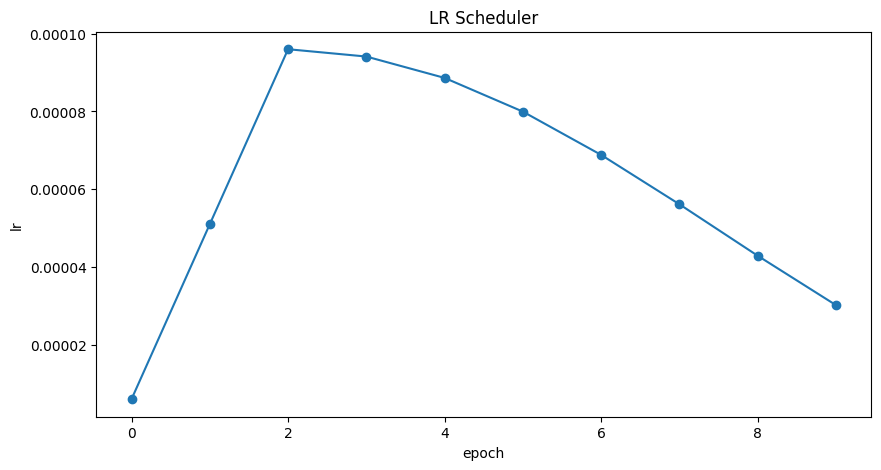

      essay_id  full_text  score  fold
0      000d118  many p...      3   3.0
1      000fe60  i am a...      3   4.0
2      001ab80  people...      4   1.0
4      002ba53  dear, ...      3   2.0
5      0030e86  if i w...      4   2.0
...        ...        ...    ...   ...
17299  ffc9095  venus,...      3   4.0
17301  ffcb264  using ...      2   4.0
17302  ffd378d  the st...      2   4.0
17303  ffddf1f  techno...      4   4.0
17304  fff016d  if you...      2   4.0

[13845 rows x 4 columns]
0        3
1        3
2        4
4        3
5        4
        ..
17299    3
17301    2
17302    2
17303    4
17304    2
Name: score, Length: 13845, dtype: int64
      essay_id  full_text  score  fold
3      001bdc0  we all...      4   0.0
6      0033037  the po...      2   0.0
15     0066c7c  my pos...      2   0.0
18     0072128  imagin...      4   0.0
20     0079f2a  in the...      2   0.0
...        ...        ...    ...   ...
17278  ff74f94  votes ...      5   0.0
17285  ff988c9  countr...      3

I0000 00:00:1719862978.361796     123 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1719862978.471131     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


432/433 ━━━━━━━━━━━━━━━━━━━━ 0s 722ms/step - loss: 0.4358 - weighted_kappa: 0.1852

W0000 00:00:1719863391.558209     122 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


433/433 ━━━━━━━━━━━━━━━━━━━━ 0s 956ms/step - loss: 0.4355 - weighted_kappa: 0.1858
Epoch 1: val_loss improved from inf to 0.20377, saving model to /kaggle/working/model_checkpoint_fold_0.weights.h5


W0000 00:00:1719863428.248073     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


433/433 ━━━━━━━━━━━━━━━━━━━━ 597s 1s/step - loss: 0.4353 - weighted_kappa: 0.1864 - val_loss: 0.2038 - val_weighted_kappa: 0.6699 - learning_rate: 6.0000e-06
Epoch 2/3
433/433 ━━━━━━━━━━━━━━━━━━━━ 0s 722ms/step - loss: 0.1953 - weighted_kappa: 0.6744
Epoch 2: val_loss improved from 0.20377 to 0.15533, saving model to /kaggle/working/model_checkpoint_fold_0.weights.h5
433/433 ━━━━━━━━━━━━━━━━━━━━ 340s 784ms/step - loss: 0.1953 - weighted_kappa: 0.6745 - val_loss: 0.1553 - val_weighted_kappa: 0.7657 - learning_rate: 5.1000e-05
Epoch 3/3
433/433 ━━━━━━━━━━━━━━━━━━━━ 0s 722ms/step - loss: 0.1656 - weighted_kappa: 0.7417
Epoch 3: val_loss did not improve from 0.15533
433/433 ━━━━━━━━━━━━━━━━━━━━ 337s 778ms/step - loss: 0.1656 - weighted_kappa: 0.7418 - val_loss: 0.1565 - val_weighted_kappa: 0.7467 - learning_rate: 9.6000e-05


Attaching 'config.json' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...
Attaching 'config.json' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...
Attaching 'model.weights.h5' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...


/kaggle/working/model_checkpoint_fold_1.weights.h5


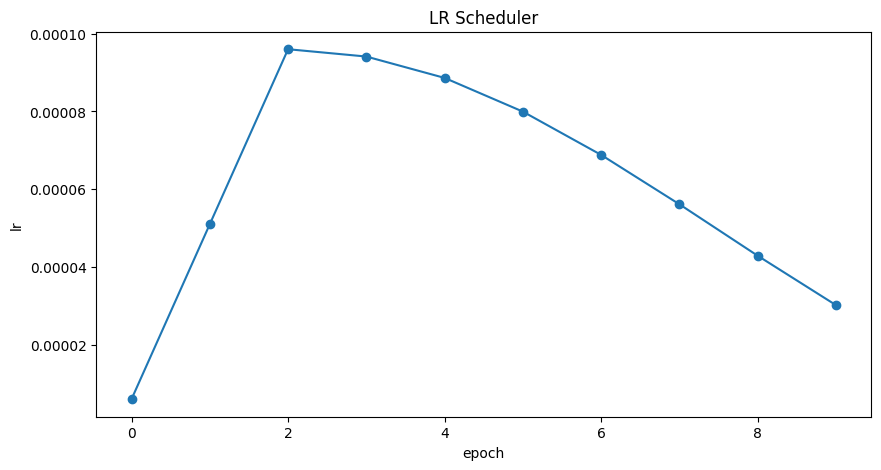

      essay_id  full_text  score  fold
0      000d118  many p...      3   3.0
1      000fe60  i am a...      3   4.0
3      001bdc0  we all...      4   0.0
4      002ba53  dear, ...      3   2.0
5      0030e86  if i w...      4   2.0
...        ...        ...    ...   ...
17302  ffd378d  the st...      2   4.0
17303  ffddf1f  techno...      4   4.0
17304  fff016d  if you...      2   4.0
17305  fffb49b  in "th...      1   0.0
17306  fffed3e  venus ...      2   0.0

[13845 rows x 4 columns]
0        3
1        3
3        4
4        3
5        4
        ..
17302    2
17303    4
17304    2
17305    1
17306    2
Name: score, Length: 13845, dtype: int64
      essay_id  full_text  score  fold
2      001ab80  people...      4   1.0
8      0036253  the ch...      2   1.0
10     004229b  i do n...      2   1.0
25     0087059  ''the ...      1   1.0
26     0098ef4  many p...      4   1.0
...        ...        ...    ...   ...
17269  ff44d61  venus ...      2   1.0
17283  ff96497  german...      2

W0000 00:00:1719864255.504717     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


432/433 ━━━━━━━━━━━━━━━━━━━━ 0s 723ms/step - loss: 0.4330 - weighted_kappa: 0.2551

W0000 00:00:1719864661.267429     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


433/433 ━━━━━━━━━━━━━━━━━━━━ 0s 939ms/step - loss: 0.4327 - weighted_kappa: 0.2557
Epoch 1: val_loss improved from inf to 0.19671, saving model to /kaggle/working/model_checkpoint_fold_1.weights.h5


W0000 00:00:1719864697.758592     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


433/433 ━━━━━━━━━━━━━━━━━━━━ 587s 1s/step - loss: 0.4324 - weighted_kappa: 0.2562 - val_loss: 0.1967 - val_weighted_kappa: 0.6692 - learning_rate: 6.0000e-06
Epoch 2/3
433/433 ━━━━━━━━━━━━━━━━━━━━ 0s 722ms/step - loss: 0.1947 - weighted_kappa: 0.6755
Epoch 2: val_loss improved from 0.19671 to 0.16902, saving model to /kaggle/working/model_checkpoint_fold_1.weights.h5
433/433 ━━━━━━━━━━━━━━━━━━━━ 340s 785ms/step - loss: 0.1947 - weighted_kappa: 0.6755 - val_loss: 0.1690 - val_weighted_kappa: 0.7525 - learning_rate: 5.1000e-05
Epoch 3/3
433/433 ━━━━━━━━━━━━━━━━━━━━ 0s 723ms/step - loss: 0.1659 - weighted_kappa: 0.7365
Epoch 3: val_loss improved from 0.16902 to 0.15677, saving model to /kaggle/working/model_checkpoint_fold_1.weights.h5
433/433 ━━━━━━━━━━━━━━━━━━━━ 340s 786ms/step - loss: 0.1659 - weighted_kappa: 0.7365 - val_loss: 0.1568 - val_weighted_kappa: 0.7605 - learning_rate: 9.6000e-05


Attaching 'config.json' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...
Attaching 'config.json' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...
Attaching 'model.weights.h5' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...


/kaggle/working/model_checkpoint_fold_2.weights.h5


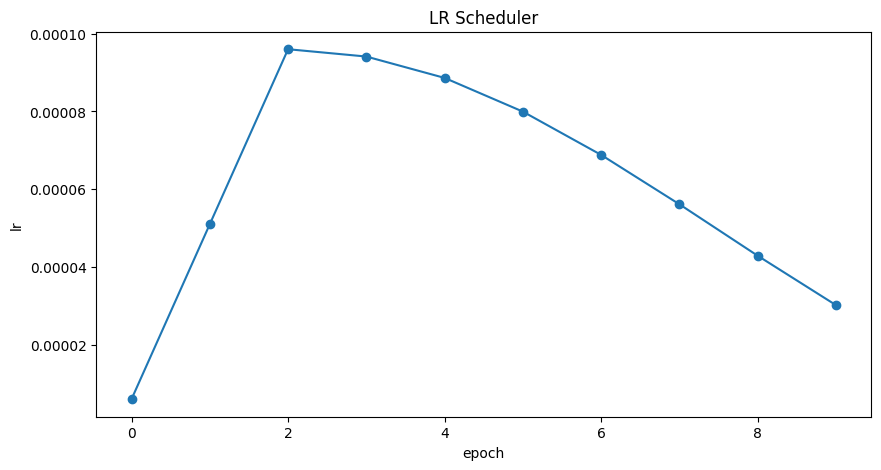

      essay_id  full_text  score  fold
0      000d118  many p...      3   3.0
1      000fe60  i am a...      3   4.0
2      001ab80  people...      4   1.0
3      001bdc0  we all...      4   0.0
6      0033037  the po...      2   0.0
...        ...        ...    ...   ...
17302  ffd378d  the st...      2   4.0
17303  ffddf1f  techno...      4   4.0
17304  fff016d  if you...      2   4.0
17305  fffb49b  in "th...      1   0.0
17306  fffed3e  venus ...      2   0.0

[13846 rows x 4 columns]
0        3
1        3
2        4
3        4
6        2
        ..
17302    2
17303    4
17304    2
17305    1
17306    2
Name: score, Length: 13846, dtype: int64
      essay_id  full_text  score  fold
4      002ba53  dear, ...      3   2.0
5      0030e86  if i w...      4   2.0
9      0040e27  there ...      3   2.0
11     0047cb3  "it is...      2   2.0
12     005a72e  i agre...      4   2.0
...        ...        ...    ...   ...
17272  ff4c9d0  do you...      2   2.0
17274  ff5e20b  have y...      3

W0000 00:00:1719865575.954914     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


432/433 ━━━━━━━━━━━━━━━━━━━━ 0s 723ms/step - loss: 0.4495 - weighted_kappa: 0.2103

W0000 00:00:1719866005.901528     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


433/433 ━━━━━━━━━━━━━━━━━━━━ 0s 995ms/step - loss: 0.4492 - weighted_kappa: 0.2109
Epoch 1: val_loss improved from inf to 0.19595, saving model to /kaggle/working/model_checkpoint_fold_2.weights.h5


W0000 00:00:1719866043.523410     122 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


433/433 ━━━━━━━━━━━━━━━━━━━━ 616s 1s/step - loss: 0.4489 - weighted_kappa: 0.2114 - val_loss: 0.1960 - val_weighted_kappa: 0.6964 - learning_rate: 6.0000e-06
Epoch 2/3
433/433 ━━━━━━━━━━━━━━━━━━━━ 0s 723ms/step - loss: 0.1964 - weighted_kappa: 0.6694
Epoch 2: val_loss improved from 0.19595 to 0.15725, saving model to /kaggle/working/model_checkpoint_fold_2.weights.h5
433/433 ━━━━━━━━━━━━━━━━━━━━ 340s 785ms/step - loss: 0.1964 - weighted_kappa: 0.6694 - val_loss: 0.1572 - val_weighted_kappa: 0.7580 - learning_rate: 5.1000e-05
Epoch 3/3
433/433 ━━━━━━━━━━━━━━━━━━━━ 0s 725ms/step - loss: 0.1700 - weighted_kappa: 0.7235
Epoch 3: val_loss did not improve from 0.15725
433/433 ━━━━━━━━━━━━━━━━━━━━ 339s 782ms/step - loss: 0.1700 - weighted_kappa: 0.7236 - val_loss: 0.1596 - val_weighted_kappa: 0.7495 - learning_rate: 9.6000e-05


Attaching 'config.json' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...
Attaching 'config.json' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...
Attaching 'model.weights.h5' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...


/kaggle/working/model_checkpoint_fold_3.weights.h5


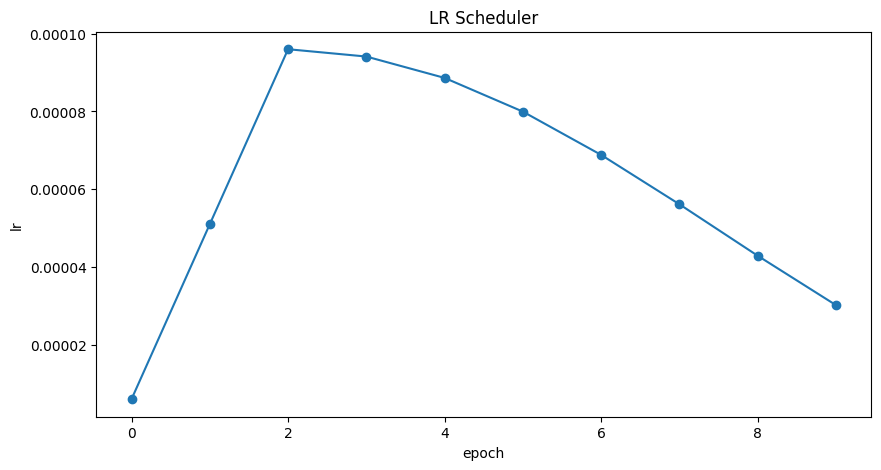

      essay_id  full_text  score  fold
1      000fe60  i am a...      3   4.0
2      001ab80  people...      4   1.0
3      001bdc0  we all...      4   0.0
4      002ba53  dear, ...      3   2.0
5      0030e86  if i w...      4   2.0
...        ...        ...    ...   ...
17302  ffd378d  the st...      2   4.0
17303  ffddf1f  techno...      4   4.0
17304  fff016d  if you...      2   4.0
17305  fffb49b  in "th...      1   0.0
17306  fffed3e  venus ...      2   0.0

[13846 rows x 4 columns]
1        3
2        4
3        4
4        3
5        4
        ..
17302    2
17303    4
17304    2
17305    1
17306    2
Name: score, Length: 13846, dtype: int64
      essay_id  full_text  score  fold
0      000d118  many p...      3   3.0
39     00d027f  imagin...      3   3.0
40     00d4911  to the...      4   3.0
45     00e047b  a car ...      4   3.0
51     00f6383  lately...      3   3.0
...        ...        ...    ...   ...
17268  ff4426e  a day ...      4   3.0
17273  ff5c95f  techno...      5

W0000 00:00:1719866876.662892     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


432/433 ━━━━━━━━━━━━━━━━━━━━ 0s 724ms/step - loss: 0.4799 - weighted_kappa: 0.1132

W0000 00:00:1719867293.583872     122 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


433/433 ━━━━━━━━━━━━━━━━━━━━ 0s 965ms/step - loss: 0.4796 - weighted_kappa: 0.1137
Epoch 1: val_loss improved from inf to 0.21233, saving model to /kaggle/working/model_checkpoint_fold_3.weights.h5


W0000 00:00:1719867331.836030     122 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


433/433 ━━━━━━━━━━━━━━━━━━━━ 604s 1s/step - loss: 0.4793 - weighted_kappa: 0.1142 - val_loss: 0.2123 - val_weighted_kappa: 0.6721 - learning_rate: 6.0000e-06
Epoch 2/3
433/433 ━━━━━━━━━━━━━━━━━━━━ 0s 724ms/step - loss: 0.1998 - weighted_kappa: 0.6734
Epoch 2: val_loss improved from 0.21233 to 0.16359, saving model to /kaggle/working/model_checkpoint_fold_3.weights.h5
433/433 ━━━━━━━━━━━━━━━━━━━━ 343s 787ms/step - loss: 0.1997 - weighted_kappa: 0.6734 - val_loss: 0.1636 - val_weighted_kappa: 0.7409 - learning_rate: 5.1000e-05
Epoch 3/3
433/433 ━━━━━━━━━━━━━━━━━━━━ 0s 727ms/step - loss: 0.1699 - weighted_kappa: 0.7268
Epoch 3: val_loss did not improve from 0.16359
433/433 ━━━━━━━━━━━━━━━━━━━━ 339s 784ms/step - loss: 0.1699 - weighted_kappa: 0.7269 - val_loss: 0.1681 - val_weighted_kappa: 0.7278 - learning_rate: 9.6000e-05


Attaching 'config.json' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...
Attaching 'config.json' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...
Attaching 'model.weights.h5' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...


/kaggle/working/model_checkpoint_fold_4.weights.h5


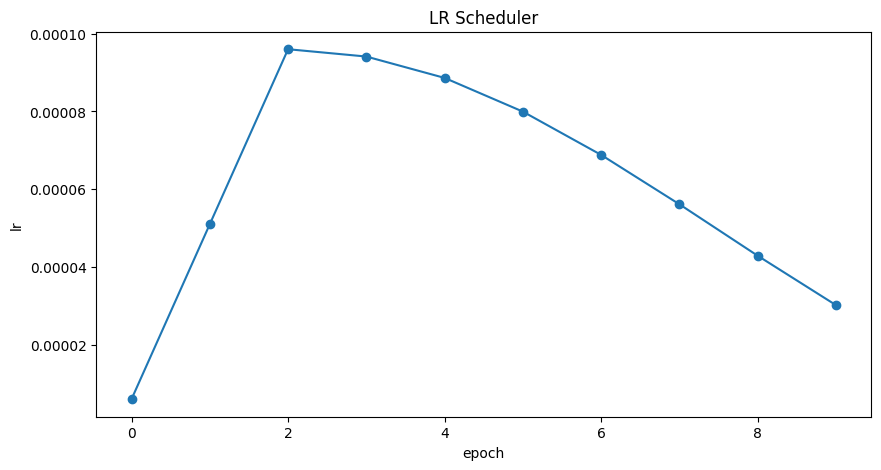

      essay_id  full_text  score  fold
0      000d118  many p...      3   3.0
2      001ab80  people...      4   1.0
3      001bdc0  we all...      4   0.0
4      002ba53  dear, ...      3   2.0
5      0030e86  if i w...      4   2.0
...        ...        ...    ...   ...
17295  ffb595e  walkin...      3   3.0
17297  ffbd0b4  do you...      2   2.0
17300  ffcb061  becomi...      3   0.0
17305  fffb49b  in "th...      1   0.0
17306  fffed3e  venus ...      2   0.0

[13846 rows x 4 columns]
0        3
2        4
3        4
4        3
5        4
        ..
17295    3
17297    2
17300    3
17305    1
17306    2
Name: score, Length: 13846, dtype: int64
      essay_id  full_text  score  fold
1      000fe60  i am a...      3   4.0
7      0033bf4  what i...      3   4.0
13     00613e3  the el...      3   4.0
14     0065bd6  driver...      3   4.0
16     006c931  what i...      3   4.0
...        ...        ...    ...   ...
17299  ffc9095  venus,...      3   4.0
17301  ffcb264  using ...      2

W0000 00:00:1719868182.334548     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


432/433 ━━━━━━━━━━━━━━━━━━━━ 0s 724ms/step - loss: 0.4836 - weighted_kappa: 0.0990

W0000 00:00:1719868615.162171     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


433/433 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 0.4832 - weighted_kappa: 0.0996   
Epoch 1: val_loss improved from inf to 0.20436, saving model to /kaggle/working/model_checkpoint_fold_4.weights.h5


W0000 00:00:1719868652.969585     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


433/433 ━━━━━━━━━━━━━━━━━━━━ 633s 1s/step - loss: 0.4829 - weighted_kappa: 0.1002 - val_loss: 0.2044 - val_weighted_kappa: 0.6916 - learning_rate: 6.0000e-06
Epoch 2/3
433/433 ━━━━━━━━━━━━━━━━━━━━ 0s 724ms/step - loss: 0.2010 - weighted_kappa: 0.6590
Epoch 2: val_loss improved from 0.20436 to 0.16146, saving model to /kaggle/working/model_checkpoint_fold_4.weights.h5
433/433 ━━━━━━━━━━━━━━━━━━━━ 341s 787ms/step - loss: 0.2010 - weighted_kappa: 0.6590 - val_loss: 0.1615 - val_weighted_kappa: 0.7555 - learning_rate: 5.1000e-05
Epoch 3/3
433/433 ━━━━━━━━━━━━━━━━━━━━ 0s 724ms/step - loss: 0.1664 - weighted_kappa: 0.7359
Epoch 3: val_loss improved from 0.16146 to 0.15846, saving model to /kaggle/working/model_checkpoint_fold_4.weights.h5
433/433 ━━━━━━━━━━━━━━━━━━━━ 341s 786ms/step - loss: 0.1664 - weighted_kappa: 0.7359 - val_loss: 0.1585 - val_weighted_kappa: 0.7688 - learning_rate: 9.6000e-05


In [32]:
models = []


for fold in range(n_splits):


    classifier = keras_nlp.models.DebertaV3Classifier.from_preset(
        CFG.preset, preprocessor=None, num_classes=6
    )
    inputs = classifier.input
    logits = classifier(inputs)

    # Compute final output
    outputs = keras.layers.Activation("sigmoid")(logits)

    # Build Model
    model = keras.Model(inputs, outputs)

    # Compile the model with optimizer, loss, and metrics
    model.compile(
        optimizer=keras.optimizers.Adam(5e-6),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=[
            WeightedKappa()
        ],
    )
    
    checkpoint_path = f'/kaggle/working/model_checkpoint_fold_{fold}.weights.h5'
    print(checkpoint_path)
    
    # Define the ModelCheckpoint callback
    checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path,
        monitor='val_loss',  # Save the model based on validation loss
        save_weights_only=True,  # Save only the weights
        save_best_only=True,  # Save only the best model
        verbose=1
    )

    lr_cb = get_lr_callback(CFG.batch_size, plot=True)

    # Take out the training and validation sets for 5 kfold segmentation separately
    X_train = train_df[train_df["fold"] != fold]
    y_train = train_df[train_df["fold"] != fold]["score"]
    print(X_train)
    print(y_train)
    train_label_one_hot = to_ordinal( y_train.values)
    
    train_essay_tensor = tf.constant(X_train['full_text'].values)
    train_dataset = tf.data.Dataset.from_tensor_slices((train_essay_tensor, train_label_one_hot))

    train_dataset = train_dataset.map(preprocess_fn,num_parallel_calls=tf.data.AUTOTUNE)
    train_dataset = train_dataset.batch(CFG.batch_size).prefetch(tf.data.experimental.AUTOTUNE)


    X_eval = train_df[train_df["fold"] == fold]
    y_eval = train_df[train_df["fold"] == fold]["score"]
    print(X_eval)
    print(y_eval)
    eval_essay_tensor = tf.constant(X_eval['full_text'].values)
    labels_one_hot_eval = to_ordinal( y_eval.values)

    eval_dataset = tf.data.Dataset.from_tensor_slices((eval_essay_tensor, labels_one_hot_eval))

    eval_dataset = eval_dataset.map(preprocess_fn,num_parallel_calls=tf.data.AUTOTUNE)
    eval_dataset = eval_dataset.batch(CFG.batch_size).prefetch(tf.data.experimental.AUTOTUNE)

    print('\nFold_{} Training ================================\n'.format(fold+1))

    # Training model
    history = model.fit(
        train_dataset,
        epochs=CFG.epochs,
        validation_data=eval_dataset,
        callbacks=[lr_cb, checkpoint_callback]
    )
    models.append(model)

In [19]:
# deberta_v3_backbone = classifier.backbone
# backbone_output = deberta_v3_backbone(inputs)

# multi_output_model = keras.Model(inputs=inputs, outputs=[backbone_output])


In [47]:
# for layer in classifier.layers:
#     print(f"Layer Name: {layer.name}")
#     print(f"Class: {layer.__class__.__name__}")
    
#     # Check if layer has weights
#     if layer.weights:
#         print("Weights:")
#         for weight in layer.weights:
#             print(f"- {weight.name}: {weight.shape}")
    
#     # Check if layer has output shape (try-except for layers without output_shape)
#     try:
#         output_shape = layer.compute_output_shape(layer.input_shape)
#         print(f"Output Shape: {output_shape}")
#     except AttributeError:
#         print("Output Shape: Not Available")

Layer Name: padding_mask
Class: InputLayer
Output Shape: Not Available
Layer Name: token_ids
Class: InputLayer
Output Shape: Not Available
Layer Name: deberta_v3_backbone
Class: DebertaV3Backbone
Weights:
- embeddings: (128100, 384)
- gamma: (384,)
- beta: (384,)
- rel_embedding: (512, 384)
- gamma: (384,)
- beta: (384,)
- kernel: (384, 6, 64)
- bias: (6, 64)
- kernel: (384, 6, 64)
- bias: (6, 64)
- kernel: (384, 6, 64)
- bias: (6, 64)
- kernel: (384, 384)
- bias: (384,)
- gamma: (384,)
- beta: (384,)
- gamma: (384,)
- beta: (384,)
- kernel: (384, 1536)
- bias: (1536,)
- kernel: (1536, 384)
- bias: (384,)
- kernel: (384, 6, 64)
- bias: (6, 64)
- kernel: (384, 6, 64)
- bias: (6, 64)
- kernel: (384, 6, 64)
- bias: (6, 64)
- kernel: (384, 384)
- bias: (384,)
- gamma: (384,)
- beta: (384,)
- gamma: (384,)
- beta: (384,)
- kernel: (384, 1536)
- bias: (1536,)
- kernel: (1536, 384)
- bias: (384,)
- kernel: (384, 6, 64)
- bias: (6, 64)
- kernel: (384, 6, 64)
- bias: (6, 64)
- kernel: (384, 6, 

NotImplementedError: Layer DebertaV3Backbone should implement `def compute_output_shape(self, input_shape)`.

## Folded Embedding

In [33]:
def create_model(weights_path):
    classifier = keras_nlp.models.DebertaV3Classifier.from_preset(
        CFG.preset, preprocessor=None, num_classes=6
    )
    inputs = classifier.input
    logits = classifier(inputs)

    # Compute final output
    outputs = keras.layers.Activation("sigmoid")(logits)

    # Build Model
    model = keras.Model(inputs, outputs)

    # Compile the model with optimizer, loss, and metrics
    model.compile(
        optimizer=keras.optimizers.Adam(5e-6),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=[
            WeightedKappa()
        ],
    )
    model.load_weights(weights_path)
    deberta_v3_backbone = classifier.backbone
    backbone_output = deberta_v3_backbone(inputs)
    multi_output_model = keras.Model(inputs=inputs, outputs=[backbone_output])
    return multi_output_model

In [34]:
#/kaggle/working/model_checkpoint_fold_4.weights.h5

In [37]:
models = []

for fold in range(n_splits):
    weights_path  = f'/kaggle/working/model_checkpoint_fold_{fold}.weights.h5'
    models.append(create_model(weights_path))

Attaching 'config.json' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...
Attaching 'config.json' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...
Attaching 'model.weights.h5' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...
Attaching 'config.json' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...
Attaching 'config.json' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...
Attaching 'model.weights.h5' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...
Attaching 'config.json' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...
Attaching 'config.json' from model 'keras/deberta_v3/keras/deberta_v3_extra_small_en/2' to your Kaggle notebook...
Attaching 'model.weights.h5' from model 'keras/deberta_v3/keras/debert

In [38]:
models

[<Functional name=functional_21, built=True>,
 <Functional name=functional_25, built=True>,
 <Functional name=functional_29, built=True>,
 <Functional name=functional_33, built=True>,
 <Functional name=functional_37, built=True>]

In [39]:
test_df  = pd.read_csv('/kaggle/input/learning-agency-lab-automated-essay-scoring-2/train.csv')

In [40]:
test_df = test_df['full_text'].apply(lambda x: preprocess_data(x))

In [41]:
test_df

0        many p...
1        i am a...
2        people...
3        we all...
4        dear, ...
           ...    
17302    the st...
17303    techno...
17304    if you...
17305    in "th...
17306    venus ...
Name: full_text, Length: 17307, dtype: object

In [42]:
test_essay_tensor = tf.constant(test_df.values)

In [43]:
test_essay_tensor

<tf.Tensor: shape=(17307,), dtype=string, numpy=
array([b'many people have car where they live. the thing they do not know is that when you use a car alot of thing can happen like you can get in accidet or the smoke that the car has is bad to breath on if someone is walk but in vauban,germany they dont have that proble because percent of vauban\'s families do not own cars,and percent sold a car to move there. street parkig ,driveways and home garages are forbidden on the outskirts of freiburd that near the french and swiss borders. you probaly will not see a car in vauban\'s streets because they are completely "car free" but if some that lives in vauban that owns a car ownership is allowed,but there are only two places that you can park a large garages at the edge of the development,where a car owner buys a space but it not cheap to buy one they sell the space for you car for $, along with a home. the vauban people completed this in ,they said that this an example of a growing trend in

In [44]:

dataset = tf.data.Dataset.from_tensor_slices((test_essay_tensor,))

In [45]:
dataset = dataset.map(preprocess_fn,num_parallel_calls=tf.data.AUTOTUNE)

In [46]:
dataset

<_ParallelMapDataset element_spec={'token_ids': TensorSpec(shape=(512,), dtype=tf.int32, name=None), 'padding_mask': TensorSpec(shape=(512,), dtype=tf.bool, name=None)}>

In [47]:
dataset = dataset.batch(CFG.batch_size).prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
all_results = []
for batch in dataset:
    batch_results = [[] for _ in range(len(models))]
    
    for i, model in enumerate(models):
        # Perform prediction on the batch
        batch_prediction = model.predict(batch)
        
        # Reduce mean on the 512 dimension (assuming it's the second dimension, index 1)
        batch_mean = tf.reduce_mean(batch_prediction, axis=1)
        batch_results[i].append(batch_mean)
    
    # Convert list of lists to numpy array for easier manipulation
    batch_results = np.array(batch_results)
    
    # Calculate the mean across all models for each row
    batch_mean = np.mean(batch_results, axis=0)
    
    # Squeeze to remove any extra dimensions
    batch_mean = np.squeeze(batch_mean)
    
    # Append the result to our list
    all_results.append(batch_mean)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━

In [37]:
all_results = []
for batch in dataset:
    # Perform prediction on the batch
    batch_prediction = multi_output_model.predict(batch)
    
    # Reduce mean on the 512 dimension (assuming it's the second dimension, index 1)
    batch_mean = tf.reduce_mean(batch_prediction, axis=1)
    
    # Append the result to our list
    all_results.append(batch_mean)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

In [49]:
final_result = tf.concat(all_results, axis=0)

In [50]:
final_result.shape

TensorShape([17307, 384])

In [51]:
num_columns_test = len(final_result[0])
column_names = [f'deb{i+1}' for i in range(num_columns_test)]

# Convert 2D list to DataFrame
embedding_df_test = pd.DataFrame(final_result, columns=column_names)

In [52]:
embedding_df_test.to_csv("small_embedding.csv",index=False)

In [53]:
embedding_df_test

deb1      deb2      deb3      deb4      deb5      deb6      deb7  \
0     -0.516492  0.278023  0.139764 -0.398081 -0.495269 -0.292101 -0.155928   
1     -0.405694  0.102554 -0.006408 -0.111659 -0.275759 -0.192534 -0.135164   
2      0.008448  0.135209  0.064090  0.280505 -0.001395 -0.166836 -0.498658   
3     -0.470900  0.159348  0.061683  0.918012 -0.162003 -0.268180 -0.317032   
4     -0.424870  0.205698  0.093778  0.683083 -0.445597 -0.293666 -0.275403   
...         ...       ...       ...       ...       ...       ...       ...   
17302  0.061981  0.285853 -0.002893 -0.585290 -0.228415 -0.033536 -0.140495   
17303 -0.420934  0.128437  0.018692  0.869824 -0.156961 -0.308121 -0.378743   
17304 -0.030777  0.261072 -0.036976 -1.165690 -0.163949 -0.156982 -0.070146   
17305  0.038880  0.237281  0.342084 -0.202933 -0.405572  0.050509 -0.235039   
17306  0.131162  0.262093  0.088023 -0.316304 -0.128370  0.036660 -0.314015   

           deb8      deb9     deb10  ...    deb375    deb376    deb377  \
0     -0.372858 -0.529560  0.184859  ... -0.288018  1.365363  1.993760   
1     -0.050623 -0.425762  0.097665  ... -0.170562  1.096014  1.510027   
2     -0.028517  0.547046 -0.066165  ...  0.067066  0.721399  1.243682   
3     -0.176973 -0.130000  0.060933  ... -0.098399  0.617692  1.720752   
4      0.050861 -0.044056  0.162552  ... -0.120201  0.746895  1.713943   
...         ...       ...       ...  ...       ...       ...       ...   
17302  0.375024  0.329638  0.320240  ... -0.342854  1.758377  0.710903   
17303 -0.135476  0.065098  0.037830  ... -0.015692  0.685668  1.707673   
17304  0.047779 -0.261230  0.360672  ... -0.138013  1.438610  0.840203   
17305  0.328991  0.388111  0.341585  ... -0.277614  1.726059  0.979520   
17306  0.185944  0.428615  0.359092  ... -0.323165  1.617560  0.772233   

         deb378    deb379    deb380    deb381    deb382    deb383    deb384  
0      0.040042  0.852030 -0.084898  0.191585 -0.893227 -0.136974 -0.035191  
1      0.215066  0.021424 -0.116947  0.316978 -0.879809  0.040563  0.159177  
2      0.156671 -0.876445 -0.080385  0.232376 -0.516419  0.421991 -0.093268  
3      0.204588 -0.372223 -0.106193  0.196805 -0.722492  0.162423  0.199093  
4      0.157586 -0.096959 -0.189950  0.320455 -0.783464 -0.079519  0.168697  
...         ...       ...       ...       ...       ...       ...       ...  
17302  0.314694  1.510504 -0.251211  0.407002 -0.276832  0.093508  0.339771  
17303  0.254327 -0.672391 -0.104339  0.201695 -0.678340  0.216372  0.047919  
17304  0.096340  0.994124 -0.121090  0.326591 -0.720654  0.083719  0.240952  
17305  0.242923  1.365576 -0.332498  0.467195 -0.372902 -0.102513 -0.177607  
17306  0.390480  1.816971 -0.345448  0.359671 -0.188598  0.102331  0.004532  

[17307 rows x 384 columns]

In [79]:
test_pred.shape

(3, 512, 384)

In [39]:
test_preds = np.sum((test_pred>0.5).astype(int), axis=-1)

In [40]:
test_preds = test_preds.clip(1,6)

In [41]:
test_preds

array([2, 3, 4])

In [52]:
class DebertaEmbedder:
    def __init__(self):
        print("Loading DeBERTa model...")
        
        self.tokenizer = keras_nlp.models.DebertaV3Preprocessor.from_preset(
                                        "/kaggle/input/deberta_v3/keras/deberta_v3_extra_small_en/2",
                                        sequence_length=512)
        self.model = keras_nlp.models.DebertaV3Backbone.from_preset(
                        "/kaggle/input/deberta_v3/keras/deberta_v3_extra_small_en/2"
                    )
        print("Model loaded.")

    def embed(self, texts, batch_size=64):
        print("Embedding texts using DeBERTa...")
        embeddings = []
        for i in tqdm(range(0, len(texts), batch_size), desc="Processing Batches"):
            batch_texts = texts[i:i + batch_size]
            inputs = self.tokenizer(batch_texts)
            outputs = self.model(inputs)
            print(outputs)
            batch_embeddings = tf.reduce_mean(outputs, axis=1).numpy()
            embeddings.append(batch_embeddings)
        embeddings = np.vstack(embeddings)
        print("DeBERTa embeddings computed.")
        return embeddings

AttributeError: type object 'DebertaEmbedder' has no attribute 'model'

In [26]:
# processed_df = df['full_text'].apply(lambda x: preprocess_data(x))


In [53]:
embedder = DebertaEmbedder()

Loading DeBERTa model...
Model loaded.


In [55]:
embedder.model.layers

[<InputLayer name=token_ids, built=True>,
 <ReversibleEmbedding name=token_embedding, built=True>,
 <LayerNormalization name=embeddings_layer_norm, built=True>,
 <Dropout name=embeddings_dropout, built=True>,
 <InputLayer name=padding_mask, built=True>,
 <RelativeEmbedding name=rel_embedding, built=True>,
 <DisentangledAttentionEncoder name=disentangled_attention_encoder_layer_0, built=True>,
 <DisentangledAttentionEncoder name=disentangled_attention_encoder_layer_1, built=True>,
 <DisentangledAttentionEncoder name=disentangled_attention_encoder_layer_2, built=True>,
 <DisentangledAttentionEncoder name=disentangled_attention_encoder_layer_3, built=True>,
 <DisentangledAttentionEncoder name=disentangled_attention_encoder_layer_4, built=True>,
 <DisentangledAttentionEncoder name=disentangled_attention_encoder_layer_5, built=True>,
 <DisentangledAttentionEncoder name=disentangled_attention_encoder_layer_6, built=True>,
 <DisentangledAttentionEncoder name=disentangled_attention_encoder_lay

In [56]:
for layer in embedder.model.layers:
    print(f"Layer Name: {layer.name}")
    print(f"Class: {layer.__class__.__name__}")
    
    # Check if layer has weights
    if layer.weights:
        print("Weights:")
        for weight in layer.weights:
            print(f"- {weight.name}: {weight.shape}")
    
    # Check if layer has output shape (try-except for layers without output_shape)
    try:
        output_shape = layer.compute_output_shape(layer.input_shape)
        print(f"Output Shape: {output_shape}")
    except AttributeError:
        print("Output Shape: Not Available")

Layer Name: token_ids
Class: InputLayer
Output Shape: Not Available
Layer Name: token_embedding
Class: ReversibleEmbedding
Weights:
- embeddings: (128100, 384)
Output Shape: Not Available
Layer Name: embeddings_layer_norm
Class: LayerNormalization
Weights:
- gamma: (384,)
- beta: (384,)
Output Shape: Not Available
Layer Name: embeddings_dropout
Class: Dropout
Output Shape: Not Available
Layer Name: padding_mask
Class: InputLayer
Output Shape: Not Available
Layer Name: rel_embedding
Class: RelativeEmbedding
Weights:
- rel_embedding: (512, 384)
- gamma: (384,)
- beta: (384,)
Output Shape: Not Available
Layer Name: disentangled_attention_encoder_layer_0
Class: DisentangledAttentionEncoder
Weights:
- kernel: (384, 6, 64)
- bias: (6, 64)
- kernel: (384, 6, 64)
- bias: (6, 64)
- kernel: (384, 6, 64)
- bias: (6, 64)
- kernel: (384, 384)
- bias: (384,)
- gamma: (384,)
- beta: (384,)
- gamma: (384,)
- beta: (384,)
- kernel: (384, 1536)
- bias: (1536,)
- kernel: (1536, 384)
- bias: (384,)
Output

In [57]:
testingstring = [
    "Hellow worlds"
]

embeddings = embedder.embed(testingstring)


Embedding texts using DeBERTa...


Processing Batches: 100%|██████████| 1/1 [00:03<00:00,  3.90s/it]

tf.Tensor(
[[[-3.42358541e+00  3.42111327e-02 -6.07390553e-02 ... -5.95460571e-02
   -2.71938562e-01  3.40420276e-01]
  [-3.01500589e-01 -2.07662210e-03  6.78914189e-01 ...  9.81197804e-02
    7.06325054e-01  1.23137343e+00]
  [ 3.26984465e-01  2.68987179e-01  7.57826418e-02 ...  1.31482884e-01
   -3.14815849e-01  1.22710693e+00]
  ...
  [ 1.00054884e+00  1.10571735e-01  3.66602898e-01 ...  1.66072980e-01
   -5.35221323e-02  4.42429483e-01]
  [ 9.90922034e-01  9.15604681e-02  3.37171614e-01 ...  1.65065020e-01
   -9.63053629e-02  4.83165383e-01]
  [ 9.90922034e-01  9.15604681e-02  3.37171614e-01 ...  1.65065020e-01
   -9.63053629e-02  4.83165383e-01]]], shape=(1, 512, 384), dtype=float32)
DeBERTa embeddings computed.


In [58]:
embeddings.shape

(1, 384)

In [30]:
# num_columns = len(embeddings[0])
# column_names = [f'deb{i+1}' for i in range(num_columns)]

# # Convert 2D list to DataFrame
# embedding_df = pd.DataFrame(embeddings, columns=column_names)

In [31]:
# embedding_df.to_csv('embedding_df_train.csv',index=False)

In [81]:
processed_train_df = pd.read_csv('/kaggle/input/processed-test-and-train/train_processed.csv')

In [82]:
processed_train_df

essay_id  paragraph_len_between_1_100_cnt  \
0      000d118          0                         
1      000fe60          0                         
2      001ab80          0                         
3      001bdc0          0                         
4      002ba53          1                         
...        ...        ...                         
17302  ffd378d          0                         
17303  ffddf1f          0                         
17304  fff016d          0                         
17305  fffb49b          0                         
17306  fffed3e          1                         

       paragraph_len_between_101_200_cnt  paragraph_len_between_201_300_cnt  \
0              0                                  0                           
1              1                                  1                           
2              0                                  0                           
3              0                                  0                           
4              0                                  0                           
...          ...                                ...                           
17302          1                                  1                           
17303          0                                  0                           
17304          0                                  0                           
17305          0                                  0                           
17306          1                                  0                           

       paragraph_len_between_301_400_cnt  paragraph_len_between_401_500_cnt  \
0              0                                  0                           
1              2                                  1                           
2              0                                  1                           
3              2                                  0                           
4              1                                  0                           
...          ...                                ...                           
17302          0                                  1                           
17303          0                                  0                           
17304          2                                  1                           
17305          0                                  0                           
17306          0                                  0                           

       paragraph_len_between_501_600_cnt  paragraph_len_between_601_800_cnt  \
0              0                                  0                           
1              0                                  0                           
2              1                                  0                           
3              0                                  0                           
4              2                                  1                           
...          ...                                ...                           
17302          0                                  0                           
17303          0                                  2                           
17304          0                                  0                           
17305          0                                  0                           
17306          1                                  0                           

       paragraph_len_geq_100_cnt  paragraph_len_geq_150_cnt  ...  text_length  \
0              1                          1                  ...       1447     
1              5                          5                  ...        709     
2              4                          4                  ...       1491     
3              4                          4                  ...       1667     
4              4                          4                  ...       1361     
...          ...                        ...                 

In [83]:
processed_train_df = preprocess_full_text_with_readability(processed_train_df)

# Merge the newly generated feature data with the previously generated feature data
#train_features = processed_train_df.merge(word_feature_engineering(train_preprocessed), on='essay_id', how='left')

In [84]:
processed_train_df = preprocess_full_text_with_sentiment(processed_train_df)

In [85]:
processed_train_df = preprocess_full_text_with_lda(processed_train_df)

In [86]:
processed_train_df = preprocess_full_text_with_engagement(processed_train_df)

In [87]:
processed_train_df

essay_id  paragraph_len_between_1_100_cnt  \
0      000d118          0                         
1      000fe60          0                         
2      001ab80          0                         
3      001bdc0          0                         
4      002ba53          1                         
...        ...        ...                         
17302  ffd378d          0                         
17303  ffddf1f          0                         
17304  fff016d          0                         
17305  fffb49b          0                         
17306  fffed3e          1                         

       paragraph_len_between_101_200_cnt  paragraph_len_between_201_300_cnt  \
0              0                                  0                           
1              1                                  1                           
2              0                                  0                           
3              0                                  0                           
4              0                                  0                           
...          ...                                ...                           
17302          1                                  1                           
17303          0                                  0                           
17304          0                                  0                           
17305          0                                  0                           
17306          1                                  0                           

       paragraph_len_between_301_400_cnt  paragraph_len_between_401_500_cnt  \
0              0                                  0                           
1              2                                  1                           
2              0                                  1                           
3              2                                  0                           
4              1                                  0                           
...          ...                                ...                           
17302          0                                  1                           
17303          0                                  0                           
17304          2                                  1                           
17305          0                                  0                           
17306          0                                  0                           

       paragraph_len_between_501_600_cnt  paragraph_len_between_601_800_cnt  \
0              0                                  0                           
1              0                                  0                           
2              1                                  0                           
3              0                                  0                           
4              2                                  1                           
...          ...                                ...                           
17302          0                                  0                           
17303          0                                  2                           
17304          0                                  0                           
17305          0                                  0                           
17306          1                                  0                           

       paragraph_len_geq_100_cnt  paragraph_len_geq_150_cnt  ...  \
0              1                          1                  ...   
1              5                          5                  ...   
2              4                          4                  ...   
3              4                          4                  ...   
4              4                          4                  ...   
...          ...                        ...                  ...   
17302          3                          2                  ...   
17

In [88]:
embedding_train_df= pd.read_csv('/kaggle/working/small_embedding.csv')

In [89]:
merged_train = pd.concat([processed_train_df,embedding_df_test ], axis=1)

In [90]:
merged_train

essay_id  paragraph_len_between_1_100_cnt  \
0      000d118          0                         
1      000fe60          0                         
2      001ab80          0                         
3      001bdc0          0                         
4      002ba53          1                         
...        ...        ...                         
17302  ffd378d          0                         
17303  ffddf1f          0                         
17304  fff016d          0                         
17305  fffb49b          0                         
17306  fffed3e          1                         

       paragraph_len_between_101_200_cnt  paragraph_len_between_201_300_cnt  \
0              0                                  0                           
1              1                                  1                           
2              0                                  0                           
3              0                                  0                           
4              0                                  0                           
...          ...                                ...                           
17302          1                                  1                           
17303          0                                  0                           
17304          0                                  0                           
17305          0                                  0                           
17306          1                                  0                           

       paragraph_len_between_301_400_cnt  paragraph_len_between_401_500_cnt  \
0              0                                  0                           
1              2                                  1                           
2              0                                  1                           
3              2                                  0                           
4              1                                  0                           
...          ...                                ...                           
17302          0                                  1                           
17303          0                                  0                           
17304          2                                  1                           
17305          0                                  0                           
17306          0                                  0                           

       paragraph_len_between_501_600_cnt  paragraph_len_between_601_800_cnt  \
0              0                                  0                           
1              0                                  0                           
2              1                                  0                           
3              0                                  0                           
4              2                                  1                           
...          ...                                ...                           
17302          0                                  0                           
17303          0                                  2                           
17304          0                                  0                           
17305          0                                  0                           
17306          1                                  0                           

       paragraph_len_geq_100_cnt  paragraph_len_geq_150_cnt  ...    deb375  \
0              1                          1                  ... -0.288018   
1              5                          5                  ... -0.170562   
2              4                          4                  ...  0.067066   
3              4                          4                  ... -0.098399   
4              4                          4                  ... -0.120201   
...          ...                        ...                  ...       ...   


In [27]:
merged_train['score']

0        3
1        3
2        4
3        4
4        3
        ..
17302    2
17303    4
17304    2
17305    1
17306    2
Name: score, Length: 17307, dtype: int64

## Embedding for test data

In [32]:
# processed__test_df = test['full_text'].apply(lambda x: preprocess_data(x))

In [33]:
# processed__test_df

0    many people have car where they live. the thin...
1    i am a scientist at nasa that is discussing th...
2    people always wish they had the same technolog...
Name: full_text, dtype: object

In [34]:
# processed__test_df

0    many people have car where they live. the thin...
1    i am a scientist at nasa that is discussing th...
2    people always wish they had the same technolog...
Name: full_text, dtype: object

In [35]:
# embedding_df_test = None
# try:
#     print("Hello")
#     logging.info(f"bedrta embedding start: ")
#     embeddings_test = embedder.embed(processed__test_df.to_list())
#     print(embeddings_test)
#     num_columns_test = len(embeddings_test[0])
#     column_names = [f'deb{i+1}' for i in range(num_columns_test)]

#     # Convert 2D list to DataFrame
#     embedding_df_test = pd.DataFrame(embeddings_test, columns=column_names)
# except Exception as e:
#     logging.error(f"Error during embedding deberta: {e}")

Hello
Embedding texts using DeBERTa...


Processing Batches: 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

DeBERTa embeddings computed.
[[-0.12210955 -0.02981236  0.2710009  ... -0.22081536 -0.04706628
  -0.22053224]
 [-0.06428286 -0.04472257  0.23339188 ... -0.10864227 -0.07053053
  -0.01639501]
 [-0.05931892 -0.06240807  0.33283776 ...  0.00240716 -0.09783541
  -0.17576145]]


In [36]:
# embedding_df_test.to_csv('embedding_df_test.csv',index=False)

In [ ]:
preprocessed_test_df = pd.read_csv('/kaggle/input/processed-test-and-train/test_preprocessed.csv')

In [ ]:
preprocessed_test_df = preprocess_full_text_with_readability(preprocessed_test_df)
preprocessed_test_df = preprocess_full_text_with_sentiment(preprocessed_test_df)
preprocessed_test_df = preprocess_full_text_with_lda(preprocessed_test_df)

In [ ]:
embedding_df_test = pd.read_csv('/kaggle/input/text-embedding/embedding_df_test.csv')

In [ ]:
merged_test = pd.concat([preprocessed_test_df,embedding_df_test ], axis=1)

In [ ]:
merged_test

# Data Preparation

In [ ]:
merged_train['score'] = df['score']

In [ ]:
merged_train['score']

In [ ]:
merged_train.info()

In [ ]:
set(merged_test.columns)-set(merged_train.columns)

## Add k-fold details

In [91]:
n_splits = 5

seed = 42

In [92]:
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)

for i, (_, val_index) in enumerate(skf.split(merged_train, merged_train["score"])):
    merged_train.loc[val_index, "fold"] = i
    
    
print(merged_train.shape)

(17307, 2739)


 ## Feature selection

In [93]:
target = "score"
train_drop_columns = ["essay_id", "fold", "full_text", "text_tokens", "processed_text"] + [target]
#test_drop_columns = ["essay_id", "full_text", "paragraph", "text_tokens", "processed_text"]

In [94]:
def sanitize_feature_names(df):
    sanitized_columns = {col: re.sub(r'[^\w]', '_', col) for col in df.columns}
    df.rename(columns=sanitized_columns, inplace=True)
    return df

In [95]:
train_features = sanitize_feature_names(merged_train)
#test_features = sanitize_feature_names(merged_test)

In [96]:
train_features.columns

Index(['essay_id', 'paragraph_len_between_1_100_cnt',
       'paragraph_len_between_101_200_cnt',
       'paragraph_len_between_201_300_cnt',
       'paragraph_len_between_301_400_cnt',
       'paragraph_len_between_401_500_cnt',
       'paragraph_len_between_501_600_cnt',
       'paragraph_len_between_601_800_cnt', 'paragraph_len_geq_100_cnt',
       'paragraph_len_geq_150_cnt',
       ...
       'deb376', 'deb377', 'deb378', 'deb379', 'deb380', 'deb381', 'deb382',
       'deb383', 'deb384', 'fold'],
      dtype='object', length=2739)

# Training

### Loss  and evaluation methods

In [97]:
# idea from https://www.kaggle.com/code/rsakata/optimize-qwk-by-lgb/notebook#QWK-objective
def quadratic_weighted_kappa(y_true, y_pred):
    y_true = (y_true + a).round()
    y_pred = (y_pred + a).clip(1, 6).round()
    qwk = cohen_kappa_score(y_true, y_pred, weights="quadratic")
    
    return 'QWK', qwk, True

def qwk_obj(y_true, y_pred):
    labels = y_true + a
    preds = y_pred + a
    preds = preds.clip(1, 6)
    f = 1/2 * np.sum((preds-labels)**2)
    g = 1/2 * np.sum((preds-a)**2 + b)
    df = preds - labels
    dg = preds - a
    grad = (df/g - f*dg / g**2) * len(labels)
    hess = np.ones(len(labels))
    
    return grad, hess

def qwk_param_calc(y):
    a = y.mean()
    b = (y ** 2).mean() - a ** 2
    
    return np.round(a, 4), np.round(b, 4)

In [98]:
models = []

callbacks = [
    lgb.log_evaluation(period=25), 
    lgb.early_stopping(stopping_rounds=75, first_metric_only=True)
]

for fold in range(n_splits):

    model = lgb.LGBMRegressor(
                            objective = qwk_obj,
                            metrics = 'None',
                            learning_rate = 0.05,
                            max_depth = 6,
                            num_leaves = 10, 
                            colsample_bytree = 0.5,   
                            reg_alpha = 0.1,  
                            reg_lambda = 0.8,
                            n_estimators = 1024,
                            random_state = seed, 
                            extra_trees=True,
                            class_weight='balanced',
                            verbosity = - 1
                            )
    
    a, b = qwk_param_calc(train_features[train_features["fold"] != fold]["score"])
    
    # Take out the training and validation sets for 5 kfold segmentation separately
    X_train = train_features[train_features["fold"] != fold].drop(columns=train_drop_columns)
    y_train = train_features[train_features["fold"] != fold]["score"] - a

    X_eval = train_features[train_features["fold"] == fold].drop(columns=train_drop_columns)
    y_eval = train_features[train_features["fold"] == fold]["score"] - a

    print('\nFold_{} Training ================================\n'.format(fold+1))
    print(f"Fold {fold} a: {a}  ;;  b: {b}")
    
    # Training model
    lgb_model = model.fit(
                            X_train, y_train,
                            eval_names = ['train', 'valid'],
                            eval_set = [(X_train, y_train), (X_eval, y_eval)],
                            eval_metric = quadratic_weighted_kappa,
                            callbacks = callbacks
                        )
    
    models.append(model)


Fold_1 Training ================================

Fold 0 a: 2.9484  ;;  b: 1.0917
[LightGBM] [Info] Using self-defined objective function
Training until validation scores don't improve for 75 rounds
[25]	train's QWK: 0.817859	valid's QWK: 0.816217
[50]	train's QWK: 0.837613	valid's QWK: 0.834628
[75]	train's QWK: 0.845479	valid's QWK: 0.840998
[100]	train's QWK: 0.848629	valid's QWK: 0.844361
[125]	train's QWK: 0.851881	valid's QWK: 0.847177
[150]	train's QWK: 0.854485	valid's QWK: 0.848378
[175]	train's QWK: 0.856527	valid's QWK: 0.849981
[200]	train's QWK: 0.859034	valid's QWK: 0.850443
[225]	train's QWK: 0.861378	valid's QWK: 0.850959
[250]	train's QWK: 0.863364	valid's QWK: 0.8514
[275]	train's QWK: 0.865733	valid's QWK: 0.85148
[300]	train's QWK: 0.86728	valid's QWK: 0.850705
[325]	train's QWK: 0.869485	valid's QWK: 0.852176
[350]	train's QWK: 0.870881	valid's QWK: 0.852471
[375]	train's QWK: 0.872257	valid's QWK: 0.852583
[400]	train's QWK: 0.873985	valid's QWK: 0.853584
[425]	t

In [99]:
preds, trues = [], []
essay_id = []
full_text = []
for fold, model in enumerate(models):
    X_eval_cv = train_features[train_features["fold"] == fold].drop(columns=train_drop_columns)
    y_eval_cv = train_features[train_features["fold"] == fold]["score"]    
    essay_id.extend(train_features[train_features["fold"] == fold]["essay_id"])
    full_text.extend(train_features[train_features["fold"] == fold]["full_text"])
    pred = model.predict(X_eval_cv) + a
    
    pred[pred < 1] = 1
    pred[pred > 6] = 6
    
    trues.extend(y_eval_cv)
    preds.extend(np.round(pred, 0))
    
    v_score = cohen_kappa_score(trues, preds, weights="quadratic")
    
    print(f"Validation score {fold} : {v_score}")

v_score = cohen_kappa_score(trues, preds, weights="quadratic")
print(f"Validation score : {v_score}")

Validation score 0 : 0.8546772308249851
Validation score 1 : 0.8504067366360312
Validation score 2 : 0.8507743709775812
Validation score 3 : 0.8518202094610022
Validation score 4 : 0.8480281667162816
Validation score : 0.8480281667162816


## Checking what gone wrong

In [49]:
evaluating_df = pd.DataFrame({
    'essay_id': essay_id,
    'trues': trues,
    'pred': preds,
    'full_text':full_text
})


In [55]:
evaluating_df['pred'] = evaluating_df['pred'].astype(int)

In [56]:
evaluating_df

essay_id  trues  pred                                          full_text
0      001bdc0      4     4  We all heard about Venus, the planet without a...
1      0033037      2     2  The posibilty of a face reconizing computer wo...
2      0066c7c      2     2  My position on driveless cars are bad because ...
3      0072128      4     4  Imagine a world without garages, gastations, o...
4      0079f2a      2     1  In the text the author uses facts that people ...
...        ...    ...   ...                                                ...
17302  ffc9095      3     3  Venus, an extraordinary planet because of many...
17303  ffcb264      2     2  Using technology is a good way to help other i...
17304  ffd378d      2     2  the story " The Challenge of Exploing Venus " ...
17305  ffddf1f      4     4  Technology has changed a lot of ways that we l...
17306  fff016d      2     2  If you don't like sitting around all day than ...

[17307 rows x 4 columns]

In [59]:
incorrect_one  = evaluating_df[(evaluating_df['trues'] == 1) & (evaluating_df['pred'] == 2)]

In [65]:
incorrect_six  = evaluating_df[(evaluating_df['trues'] == 6) & (evaluating_df['pred'] == 5)]

In [61]:
incorrect_one.count()

essay_id     592
trues        592
pred         592
full_text    592
dtype: int64

In [66]:
incorrect_six.count()

essay_id     87
trues        87
pred         87
full_text    87
dtype: int64

In [68]:
pd.set_option('display.max_colwidth', None)

In [69]:
incorrect_one

essay_id  trues  pred  \
20     014eba6      1     2   
109    07d2045      1     2   
122    08cd1b8      1     2   
135    099fc28      1     2   
142    0a45f39      1     2   
...        ...    ...   ...   
17101  f203f9e      1     2   
17115  f2b2280      1     2   
17126  f373fee      1     2   
17205  f86059d      1     2   
17243  fb77243      1     2   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           full_text  
20                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                As I know from images and researches that aliens could possibly exist by the looks of it . Not so Postive about it , but why would there be an human face on mars when people aren't on Mars everyday of there lives. Also that by seeing pictures of hwo aliens look there similar too us in a way , but the mouth is weird shping like it's not a human mouth that people think it may be . Makes you have second thoughts and makes you want to investigate more on the " The Face On Mars " . Each year we have something new on this face of mars.\n\nSo we investigate more on these pictures to see exactly what were trying to find out because it doesn't add up how would I big hu,man face be on mars. doesn't make since too me. Yeah and like " Garvin " says we don't pass over a human face very often so something isn't right here. The scientist put there all into this to figure out what there dealing with.\n\nSo finally in 2001 we've came to an

In [72]:
correct_five = evaluating_df[(evaluating_df['trues'] == 5)]

In [77]:
correct_two  = evaluating_df[(evaluating_df['trues'] == 2)]

In [78]:
correct_three  = evaluating_df[(evaluating_df['trues'] == 3)]

In [82]:
correct_four  = evaluating_df[(evaluating_df['trues'] == 4)]

In [83]:
correct_four

essay_id  trues  pred  \
0      001bdc0      4     4   
3      0072128      4     4   
7      0084f6c      4     4   
8      00a4469      4     3   
9      00a6693      4     4   
...        ...    ...   ...   
17280  fe7b204      4     3   
17281  feb26c7      4     3   
17293  ff88e0d      4     4   
17295  ff91759      4     4   
17305  ffddf1f      4     4   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  full_text  
0                                                                                                                                                                                                                                                                  

In [79]:
correct_three

essay_id  trues  pred  \
5      0081f18      3     2   
6      008341a      3     3   
13     00e5687      3     3   
15     00f6ac7      3     3   
16     00fca9b      3     2   
...        ...    ...   ...   
17297  ff9bb09      3     3   
17298  ffa77dc      3     3   
17300  ffb732c      3     3   
17301  ffc11a8      3     3   
17302  ffc9095      3     3   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       full_text  
5                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                i think that having self driving cars would help alot. there are so many wreacks in the states because some people just dont know how to drive right.\n\nso if we was to invent and sell computerized cars it could stop us from having so many wreaks plus it would also cause us to drive way safer. for instance if your drunk and you have to get home you just sit in th

In [75]:
correct_two

essay_id  trues  pred  \
1      0033037      2     2   
2      0066c7c      2     2   
4      0079f2a      2     1   
17     0105e2e      2     2   
24     01ad79e      2     2   
...        ...    ...   ...   
17287  fee79ef      2     3   
17296  ff982af      2     2   
17303  ffcb264      2     2   
17304  ffd378d      2     2   
17306  fff016d      2     2   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    full_text  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 The posibilty of a face reconizing computer would be very helpful for children or even adults. Its would be helpful in a ways of satifying our needs and why showing us thing that would make going on the internet better.\n\nI think that the face reconizing computer would be very reliable; because in the text its says " A class room computer could recognize when a student is confused or bored". And if the students is "confused and bored" then the students is not really learning anything, beacuse all children can't be taught the same way. Some children have trouble learning or its harder for those children to learn; in a result of failing grades and low participation happening in the classroom.\n\nIn my conclusion I think that face reconizing computers would the best thing for students. In way if a students were to not understand what her/she is learning in class the face reconizing computer could realize that the child doesn't understand is and give more instructions on what to do for the topic or assingment the're doing.  
2                                                                                                                                                                                                                

In [84]:
correct_five = evaluating_df[(evaluating_df['trues'] == 5)]

In [85]:
correct_five

essay_id  trues  pred  \
27     01c5e87      5     4   
68     05592d5      5     5   
85     0670d67      5     5   
89     0689c67      5     5   
123    08cdf6e      5     4   
...        ...    ...   ...   
17253  fbd60ab      5     5   
17254  fbde6e5      5     4   
17259  fc2b46e      5     4   
17272  fe094f8      5     5   
17283  fed7163      5     5   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [70]:
incorrect_six

essay_id  trues  pred  \
144    0aae146      6     5   
868    3d9c7b9      6     5   
1031   4b037f4      6     5   
1087   4f6582d      6     5   
1127   5190863      6     5   
...        ...    ...   ...   
16147  a9c7fb1      6     5   
16385  bd3ec7d      6     5   
16836  dff0c49      6     5   
17104  f260d4e      6     5   
17165  f5e49e4      6     5   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

### Validating model

### Analyize prediction

     trues  correct_rate  correct_count  count
12     1.0   0.671725           841       1252
1      2.0   0.736185          3477       4723
5      3.0   0.675955          4245       6280
0      4.0   0.697147          2737       3926
27     5.0   0.613402           595        970
100    6.0   0.519231            81        156


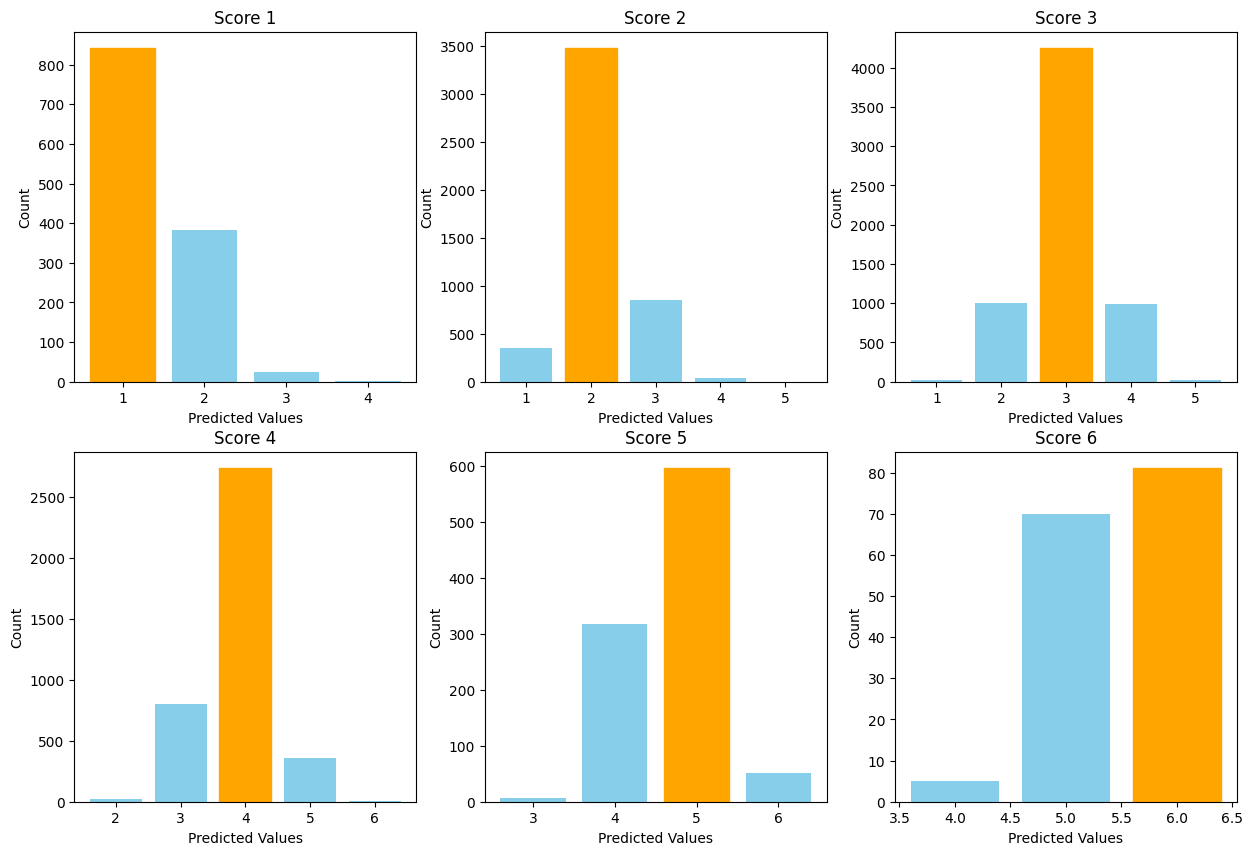

In [100]:
def analyze_preds(trues, preds):
    # Create dataframe
    model_prec = pd.DataFrame([trues, preds]).T
    model_prec.rename(columns = {0: 'trues', 1: 'preds'}, inplace=True)
    model_prec['correct'] = model_prec['trues'] == model_prec['preds']
    model_prec['count'] = model_prec.groupby('trues')['trues'].transform('count')
    model_prec['correct_count'] = model_prec.groupby('trues')['correct'].transform('sum')
    model_prec['correct_rate'] = model_prec['correct_count'] / model_prec['count']
    
    # Print binary correction rate
    print(model_prec[['trues', 'correct_rate', 'correct_count', 'count']].drop_duplicates().sort_values(by='trues'))
    
    # Plot predictions by score    
    def plot_model(ax, counts, true):
        bars = ax.bar(counts.index, counts.values, color='skyblue')

        # Find the index of the column with the specified label
        highlight_index = counts.index.get_loc(true)

        # Highlight the specified column
        bars[highlight_index].set_color('orange')

        ax.set_xlabel('Predicted Values')
        ax.set_ylabel('Count')
        ax.set_title("Score " + str(true))
    
    score_list = [1,2,3,4,5,6]
    test_pred_by_score = [model_prec[model_prec['trues'] ==  score]['preds'].value_counts() for score in score_list]

    # Create a figure and six subplots arranged in a 2x3 grid
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))    
    plot_model(axs[0, 0], test_pred_by_score[0], 1)
    plot_model(axs[0, 1], test_pred_by_score[1], 2)
    plot_model(axs[0, 2], test_pred_by_score[2], 3)
    plot_model(axs[1, 0], test_pred_by_score[3], 4)
    plot_model(axs[1, 1], test_pred_by_score[4], 5)
    plot_model(axs[1, 2], test_pred_by_score[5], 6)
    
analyze_preds(trues, preds)

### See how model workds

In [76]:
X_train_tmp = train_features.drop(columns=train_drop_columns)
y_train_tmp = train_features["score"]

def interact_tree(example_index, tree_index): 
    example = pd.DataFrame(X_train_tmp.iloc[example_index]).T
    score = y_train_tmp.iloc[example_index]
    
    print("Score: ", score)
    # Plot the first tree
    ax = lgb.plot_tree(models[1], tree_index=tree_index, figsize=(20, 8), show_info='data_percentage', example_case=example)
    plt.show()

Score:  3


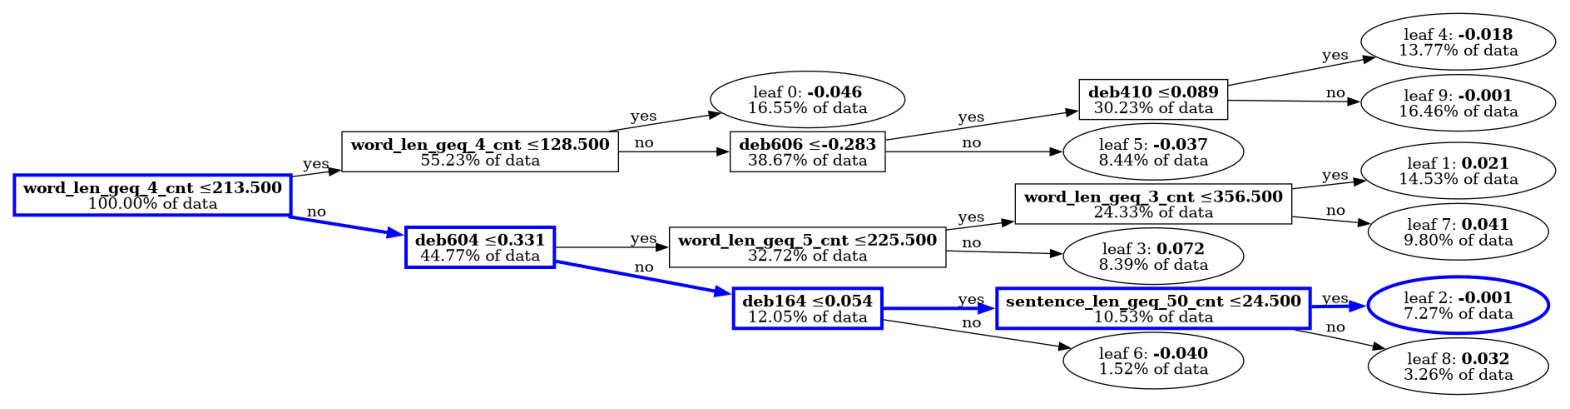

In [78]:
interact_tree(0,10)

In [79]:
top_features = ['splling_err_ratio', 'lexical_diversity', 'paragraph_count', 'word_count', 'DistanceToCentroid', 'word_len_sum']

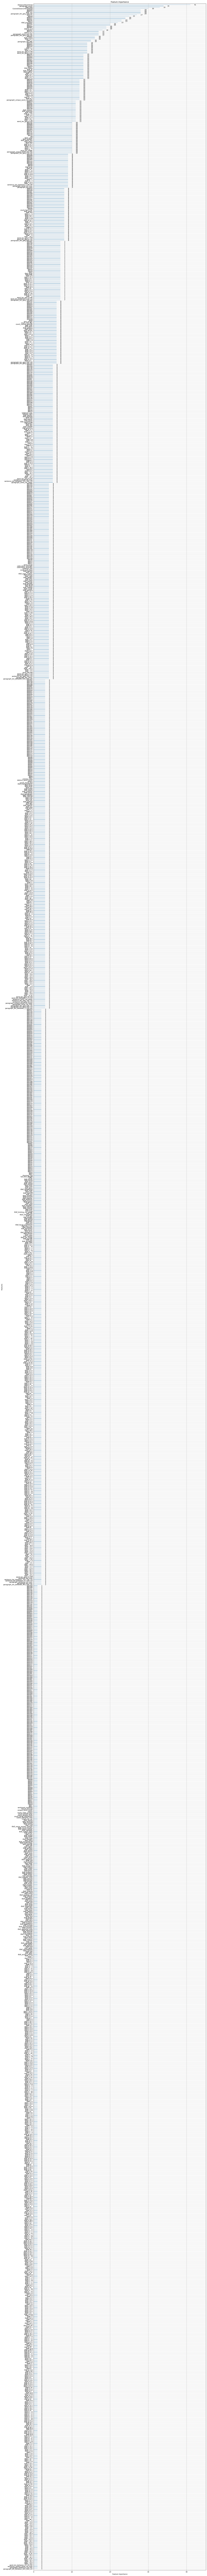

In [84]:
ax = lgb.plot_importance(models[2], figsize=(20, 300), importance_type="split")
plt.show()

In [ ]:
import csv
feature_importance_df = pd.DataFrame()
feature_names = train_features.drop(columns=train_drop_columns).columns
feature_importance_df['Feature'] = feature_names

for i in range(0, 5):
    importance = models[i].feature_importances_
    feature_importance_df[f'Importance_{i}'] = importance

feature_importance_df.to_csv("feature_importance.csv")

In [81]:
def show_feat_use(feat):
    ax = lgb.plot_split_value_histogram(models[2], figsize=(20, 8), feature=feat)
    plt.show()

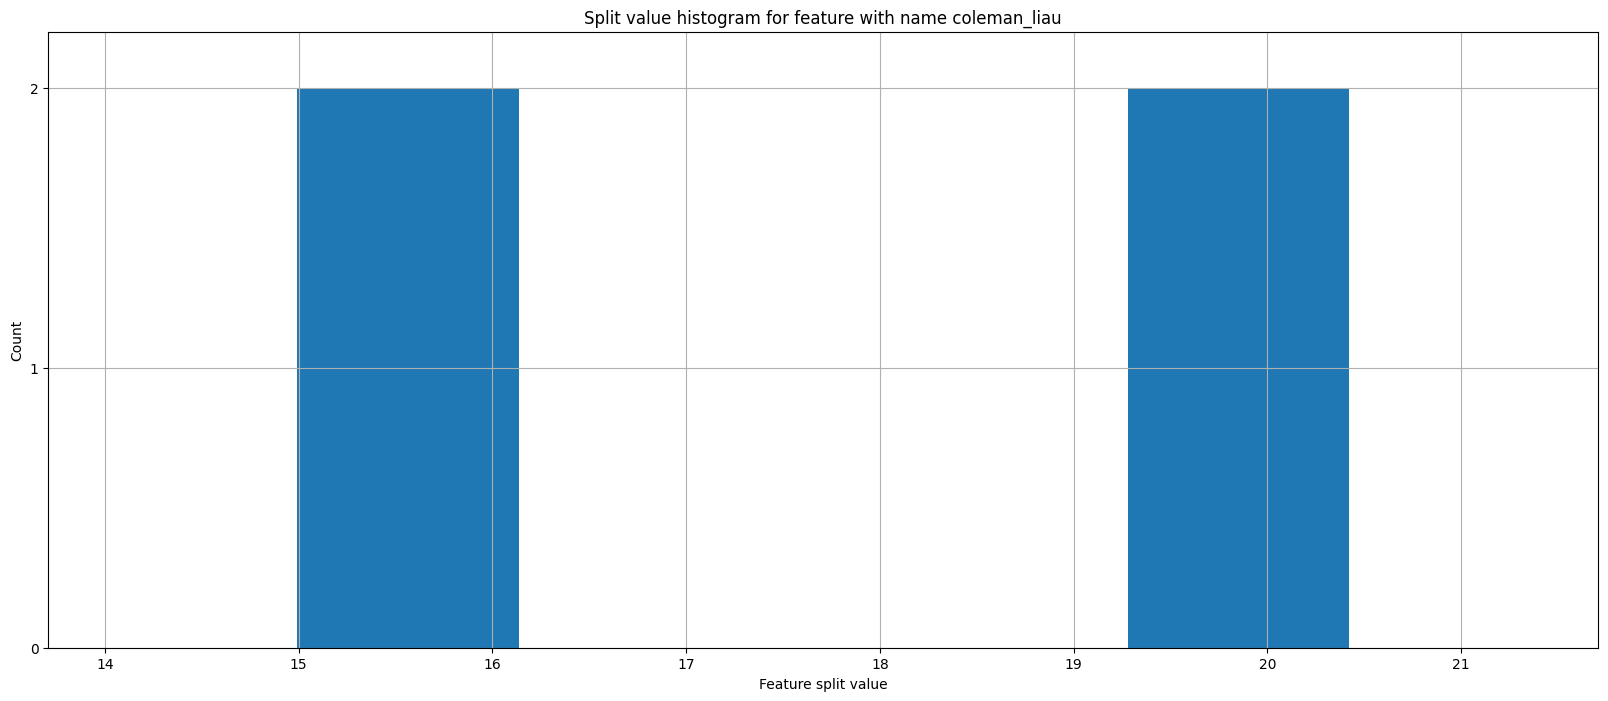

In [87]:
show_feat_use('coleman_liau')

### How overfit model is 

In [ ]:
def check_model_fit(model_id):
    ax = lgb.plot_metric(models[model_id])
    plt.show()

In [ ]:
check_model_fit(2)

### Save Model

In [101]:
for i in range(len(models)):
    models[i].booster_.save_model(f'model_{i}.txt')

## Load Model

In [ ]:
# models_path = [f"{models_base_path}/model_0.txt",f"{models_base_path}/model_1.txt",f"{models_base_path}/model_2.txt",f"{models_base_path}/model_3.txt",f"{models_base_path}/model_4.txt"]

In [ ]:
# models = []
# try:
#     logging.info(f"Model declaration:")
#     for i in range(n_splits):
#         loaded_model  = lgb.Booster(model_file=models_path[i])
#         models.append(loaded_model)
# except Exception as e:
#     logging.error(f"Error during model declaration: {e}")    

In [ ]:
models

## Prediction

In [ ]:
#test_features

In [ ]:
a

In [ ]:
preds = []
try:
    logging.info(f"prediction start: ")
    for fold, model in enumerate(models):
        X_eval_cv = test_features.drop(columns=test_drop_columns)
        pred = model.predict(X_eval_cv) + a    
        pred[pred < 1] = 1
        pred[pred > 6] = 6
        preds.append(pred)

    # Combining the 5 model results
    for i, pred in enumerate(preds):
        test_features[f"score_pred_{i}"] = pred
    test_features["score"] = np.round(test_features[[f"score_pred_{fold}" for fold in range(n_splits)]].mean(axis=1),0).astype('int32')

    # Submit to CSV
    test_features[["essay_id", "score"]].to_csv("submission.csv", index=False)
except Exception as e:
    logging.error(f"Error during prediction: {e}")

In [ ]:
test_features.head()